# Assessment 2: Individual Report

## Submitted by: Ivy Eugenio Fiecas (s8105049)

## Background 

As the leading financial institution, ProsperityBank is dedicated to fostering prosperity and financial well-being for all its customers. With a focus on innovation and customer-centric solutions, ProsperityBank continues to evolve to meet the diverse needs of its clientele. The company aims to automate the loan qualification process in real-time using information provided by customers in online application forms. Developing machine learning models is expected to enhance the prediction of loan approval. You have been tasked with developing machine learning algorithms based on the company's dataset. 

---

# 1.0 CRISP-DM Methodology¶
### Employ the CRISP-DM methodology for your analytics process.

### Project Goal: Automating Loan Qualification with Machine Learning
#### Traditional loan approval is slow, biased, and inefficient. This project aims to develop a machine learning model to predict loan approvals in real-time, enhancing efficiency, accuracy, and customer satisfaction.

### Business Objectives
#### ✅ Efficiency – Automate approvals, reduce manual effort, and accelerate processing.
#### ✅ Risk Mitigation – Improve accuracy, reduce default rates, and ensure fair lending.
#### ✅ Customer Satisfaction – Provide instant, transparent, and consistent decisions.

### Success Metrics
#### 📊 Model Performance – Accuracy, Precision, Recall, F1-Score.
#### ⚡ Operational Impact – Reduced processing time, improved risk assessment.
#### 💡 Customer Experience – Faster approvals, better satisfaction scores.

### Key Questions
#### 🔹 What factors determine loan approval?
#### 🔹 How can ML improve decision speed and fairness?
#### 🔹 What patterns exist in past approvals and rejections?
#### 🔹 How can false approvals or denials be minimized?

---

# Load the Dataset

In [13]:
import pandas as pd

# GitHub raw URL of the dataset
url = "https://raw.githubusercontent.com/ifiecas/bankloan/refs/heads/main/assessment2_dataset%20(1).csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

df.head()

,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval_Status
0,LP00031,Male,Yes,0,Graduate,No,9329,0,Rural,189.0,180.0,1.0,Y
1,LP00032,Male,Yes,2,Graduate,No,2043,1619,Rural,102.0,360.0,1.0,Y
2,LP00033,Male,Yes,0,Graduate,No,4754,2331,Urban,129.0,360.0,1.0,Y
3,LP00034,Male,No,0,Not Graduate,No,2721,0,Urban,59.0,180.0,1.0,Y
4,LP00035,Male,Yes,0,Graduate,No,2998,3419,Semiurban,56.0,180.0,1.0,Y


# 2.0 Exploratory Data Analysis and Data Preprocessing
## 2.1 Perform exploratory data analysis (EDA) to understand the dataset's structure and characteristics.

In [15]:
# Check dataset structure
df.info()

# Summary statistics for numerical columns
df.describe()

# Check for unique values in categorical columns
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               610 non-null    object 
 1   Gender                597 non-null    object 
 2   Marital_Status        607 non-null    object 
 3   Number_of_Dependents  595 non-null    object 
 4   Education_Level       610 non-null    object 
 5   Independent_Worker    578 non-null    object 
 6   Applicant_Income      610 non-null    int64  
 7   Coapplicant_Income    610 non-null    int64  
 8   Location              610 non-null    object 
 9   Amount_Requested      592 non-null    float64
 10  Term                  596 non-null    float64
 11  Credit_History        560 non-null    float64
 12  Approval_Status       610 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.1+ KB


Loan_ID                 610
Gender                    2
Marital_Status            2
Number_of_Dependents      4
Education_Level           2
Independent_Worker        2
Applicant_Income        567
Coapplicant_Income      323
Location                  3
Amount_Requested        218
Term                     10
Credit_History            2
Approval_Status           2
dtype: int64

## 2.2 Handle missing values, outliers, and irrelevant features appropriately.¶

In [17]:
# Check for missing values
df.isnull().sum()


Loan_ID                  0
Gender                  13
Marital_Status           3
Number_of_Dependents    15
Education_Level          0
Independent_Worker      32
Applicant_Income         0
Coapplicant_Income       0
Location                 0
Amount_Requested        18
Term                    14
Credit_History          50
Approval_Status          0
dtype: int64

## 2.2.1 Handle missing values

### 2.2.1.1 Gender (13 missing values)
* Strategy: Impute missing values based on the most frequent gender within similar financial contexts (Marital_Status) to avoid bias.
* Why?
    * Gender can correlate with marital status in financial behavior.
    * Avoids reinforcing gender bias by not assuming one category dominates.

In [20]:
# Grouped mode imputation for Gender based on Marital_Status
df['Gender'] = df['Gender'].fillna(df.groupby('Marital_Status')['Gender'].transform(lambda x: x.mode().iloc[0]))

# Verify imputation
df['Gender'].isnull().sum()


0

### 2.2.1.2 Marital Status (3 missing values)
* Strategy: Use mode imputation as missing values are minimal.
* Why?
    * Marital status has limited influence on loan approval.
    * Using mode ensures a neutral and consistent dataset.


In [22]:
# Mode imputation for Marital_Status
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

# Verify imputation
df['Marital_Status'].isnull().sum()


0

### 2.2.1.3 Independent Worker Status (32 missing values)
* Strategy: Impute based on Education Level to preserve fairness.
* Why?
    * Employment type is highly correlated with education and income.
    * Prevents bias by not defaulting to one category.

In [24]:
df['Gender'].fillna(df.groupby('Marital_Status')['Gender'].transform(lambda x: x.mode()[0]), inplace=True)


/var/folders/2l/64hhhnd1001ddy0gshgh050c0000gn/T/ipykernel_7101/1318031779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df.groupby('Marital_Status')['Gender'].transform(lambda x: x.mode()[0]), inplace=True)


In [25]:
# Grouped mode imputation for Independent_Worker based on Education_Level
df['Independent_Worker'] = df['Independent_Worker'].fillna(df.groupby('Education_Level')['Independent_Worker'].transform(lambda x: x.mode().iloc[0]))

# Verify imputation
df['Independent_Worker'].isnull().sum()


0

### 2.2.1.4 Number of Dependents (15 missing values)
* Strategy: Use median imputation instead of mode to ensure fair distribution.¶
* Why?
    * Mode might favor smaller families, leading to bias.
    * Median maintains fairness across all household sizes.

In [27]:
# Convert '3+' to numeric (replace '3+' with 3)
df['Number_of_Dependents'] = df['Number_of_Dependents'].replace('3+', 3)

# Convert the column to integer (handling errors gracefully)
df['Number_of_Dependents'] = pd.to_numeric(df['Number_of_Dependents'], errors='coerce')

# Apply median imputation (assigning the result back to the column)
df['Number_of_Dependents'] = df['Number_of_Dependents'].fillna(df['Number_of_Dependents'].median())

# Verify imputation
df['Number_of_Dependents'].isnull().sum(), df['Number_of_Dependents'].dtype


(0, dtype('float64'))

### 2.2.1.5 Amount Requested (18 missing values)
* Strategy: Use median imputation as loan amounts tend to be skewed.
* Why?
    * Median is more robust to outliers than mean.
    * Ensures balanced approvals across different loan sizes.

In [29]:
# Median imputation for Amount_Requested
df['Amount_Requested'] = df['Amount_Requested'].fillna(df['Amount_Requested'].median())

# Verify imputation
df['Amount_Requested'].isnull().sum()


0

### 2.2.1.6 Loan Term (14 missing values)
* Strategy: Use mode since the loans follow standard repayment periods.¶
*Why?
    * This dataset contains loans that have fixed terms (e.g., 360 days).
    * Using mode ensures the imputation reflects real-world conditions.

In [31]:
# Mode imputation for Term
df['Term'] = df['Term'].fillna(df['Term'].mode()[0])

# Verify imputation
df['Term'].isnull().sum()


0

### 2.2.1.7 Credit History (50 missing values)
* Strategy: Use KNN Imputation instead of mode to prevent bias in loan approvals.
* Why?
    * Simply using mode (1: good credit) introduces bias toward approvals.
    * KNN Imputation estimates credit history based on similar applicants, ensuring fairness.

In [33]:
# Import KNN Imputer
from sklearn.impute import KNNImputer

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation for Credit_History
df[['Credit_History']] = imputer.fit_transform(df[['Credit_History']])

# Verify imputation
df['Credit_History'].isnull().sum()


0

#### Verify there is no more missing values

In [35]:
# Check for missing values
df.isnull().sum()


Loan_ID                 0
Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education_Level         0
Independent_Worker      0
Applicant_Income        0
Coapplicant_Income      0
Location                0
Amount_Requested        0
Term                    0
Credit_History          0
Approval_Status         0
dtype: int64

### Add on: Check for unique values

In [37]:
# Check how many unique values are in each column
print("Number of unique values in each column:")
for column in df.columns:
    num_unique = df[column].nunique()
    print(f"{column}: {num_unique} unique values")

# To see the actual unique values in Credit_History:
print("\nUnique values for categorical variables")
print(df['Gender'].unique())
print(df['Marital_Status'].unique())
print(df['Number_of_Dependents'].unique())
print(df['Education_Level'].unique())
print(df['Independent_Worker'].unique())
print(df['Location'].unique())
print(df['Term'].unique())
print(df['Credit_History'].unique())
print(df['Approval_Status'].unique())

Number of unique values in each column:
Loan_ID: 610 unique values
Gender: 2 unique values
Marital_Status: 2 unique values
Number_of_Dependents: 4 unique values
Education_Level: 2 unique values
Independent_Worker: 2 unique values
Applicant_Income: 567 unique values
Coapplicant_Income: 323 unique values
Location: 3 unique values
Amount_Requested: 219 unique values
Term: 10 unique values
Credit_History: 3 unique values
Approval_Status: 2 unique values

Unique values for categorical variables
['Male' 'Female']
['Yes' 'No']
[0. 2. 1. 3.]
['Graduate' 'Not Graduate']
['No' 'Yes']
['Rural' 'Urban' 'Semiurban']
[180. 360. 480. 300.  36.  84. 240.  12. 120.  60.]
[1.         0.         0.84107143]
['Y' 'N']


### Since Credit_History should be binary (0 for bad, 1 for good credit history), the value 0.84107143 appears to be an anomaly.
* Strategy:
    * Fix the Credit_History column by converting all values to binary (0 or 1) using a 0.5 threshold
    * Values above 0.5 (including the anomalous 0.84107143) will be set to 1 (good credit)
    * The binary values will then properly represent bad (0) and good (1) credit history

In [39]:
# Count non-binary values before fixing
odd_value_count = sum((df['Credit_History'] != 0) & (df['Credit_History'] != 1))
print(f"Found {odd_value_count} rows with non-binary Credit_History values")

# Fix Credit_History - convert to binary (0 or 1)
df['Credit_History'] = (df['Credit_History'] > 0.5).astype(int)

# Verify fix is complete
print("Credit_History values after fix:", df['Credit_History'].unique())

Found 50 rows with non-binary Credit_History values
Credit_History values after fix: [1 0]


## 2.2.2 Outliers for Numerical Variables

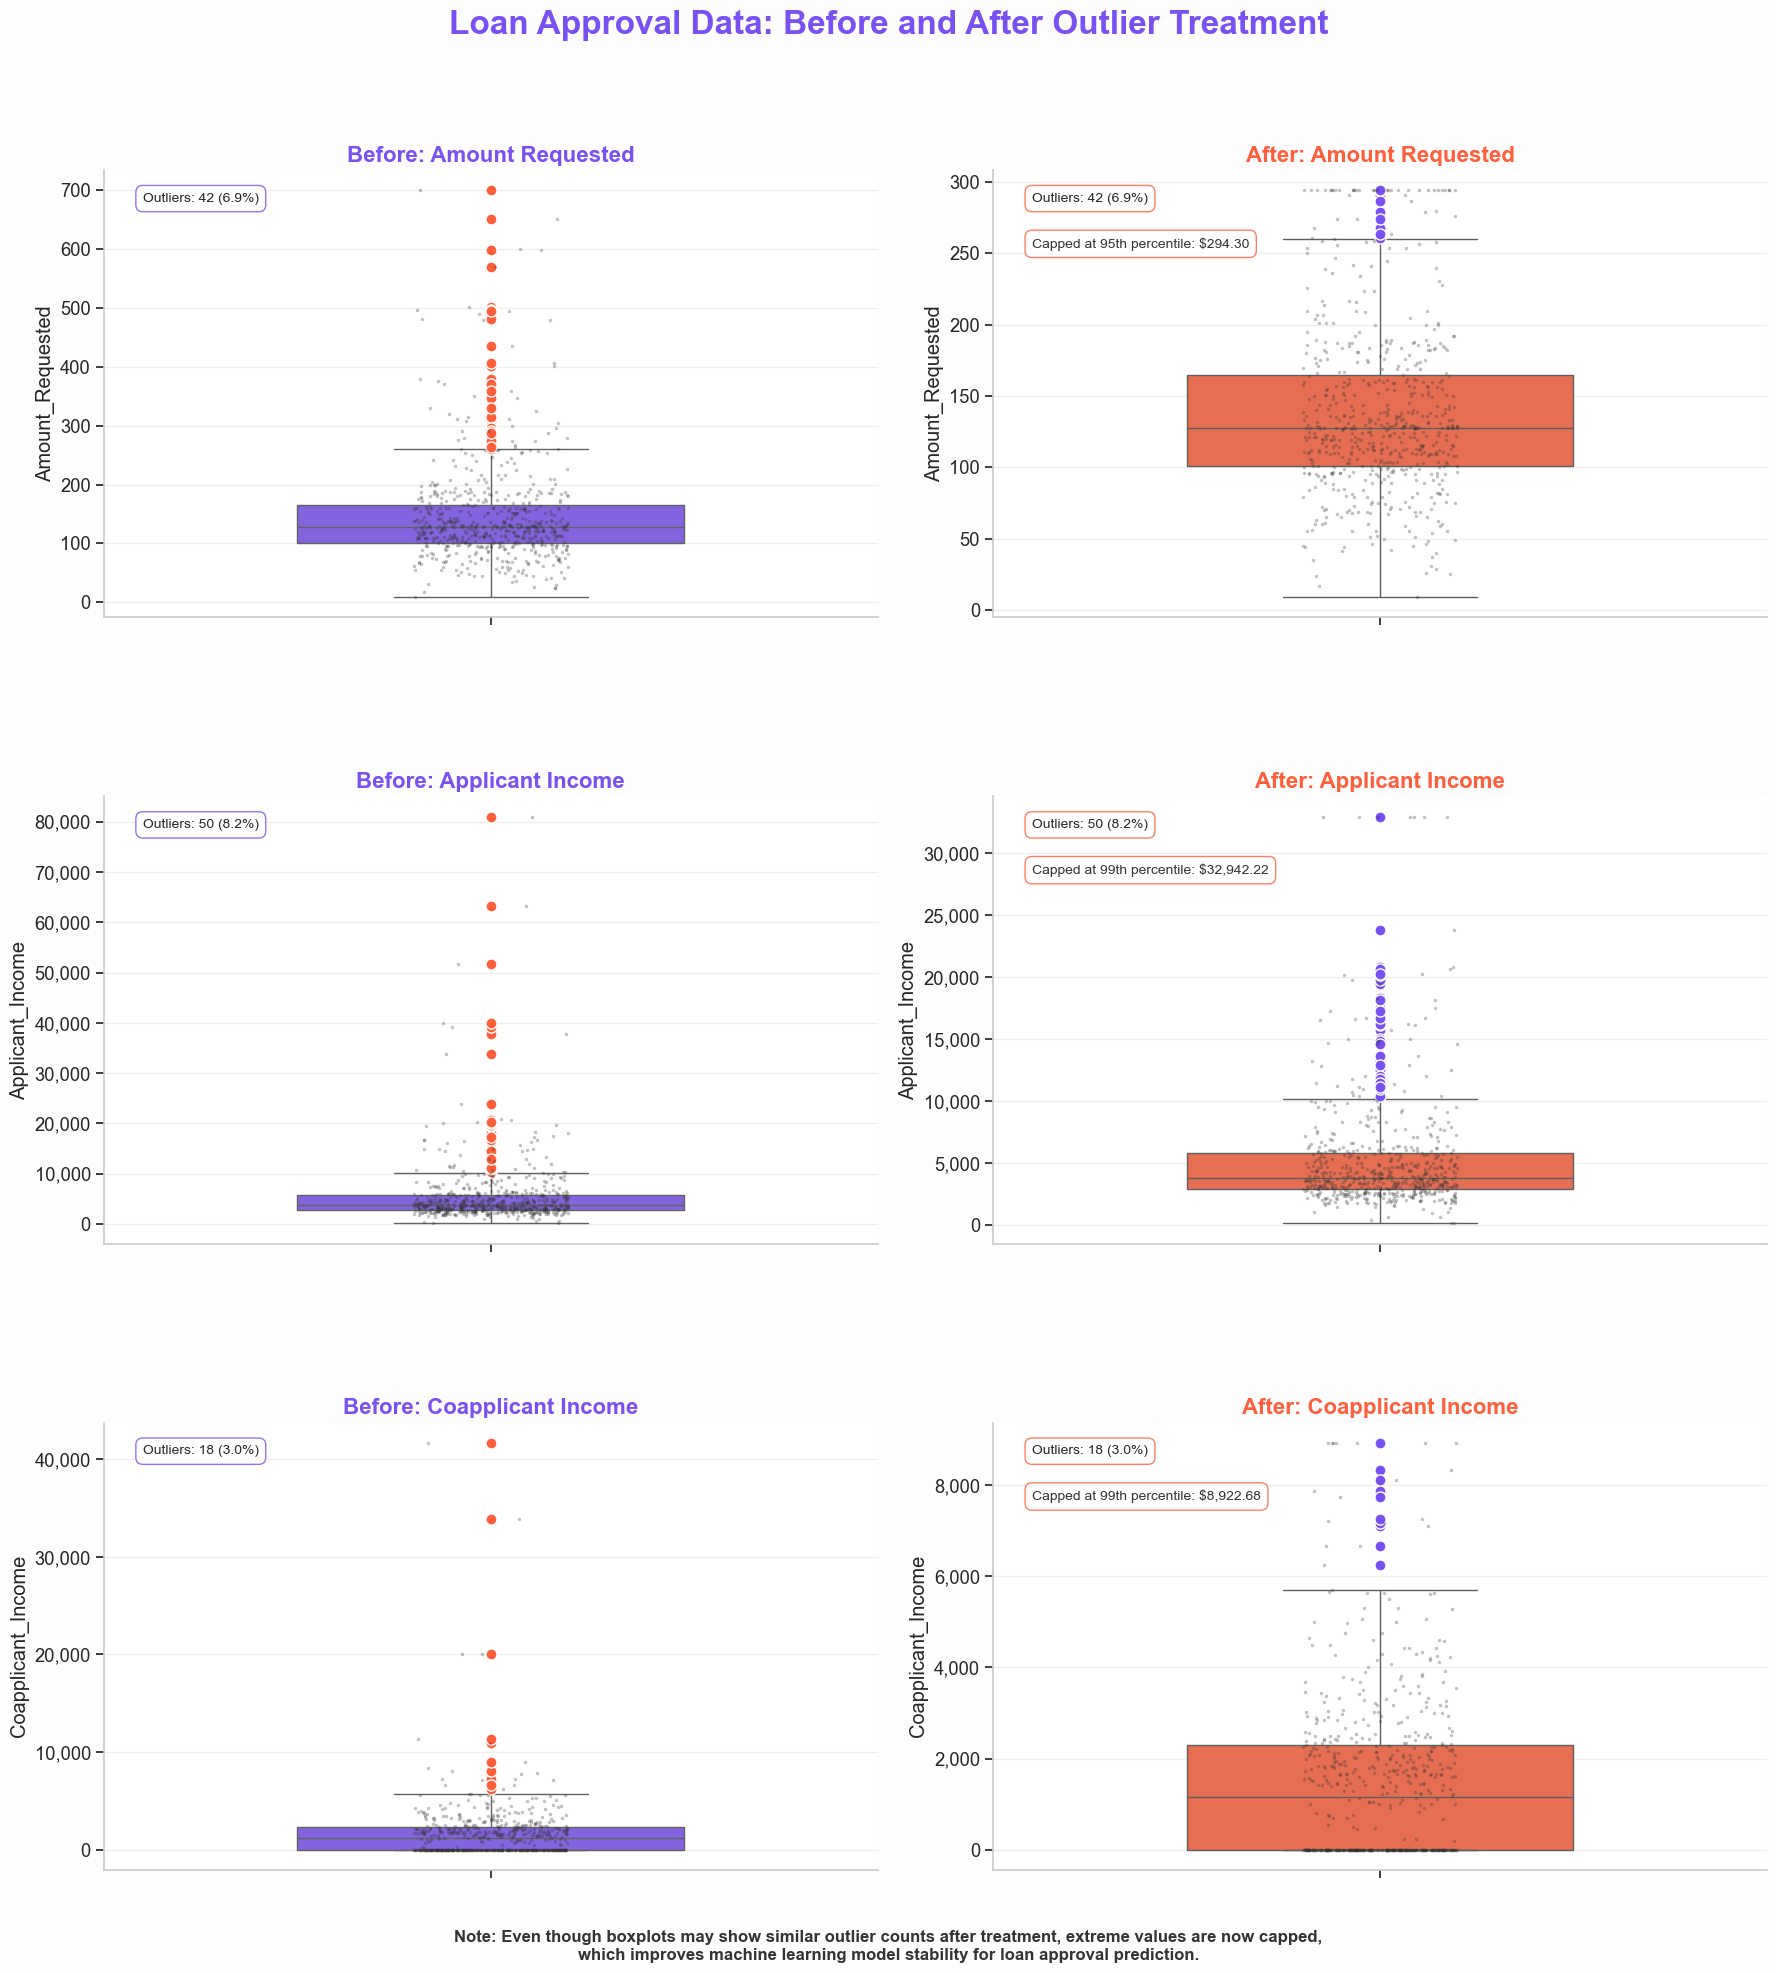

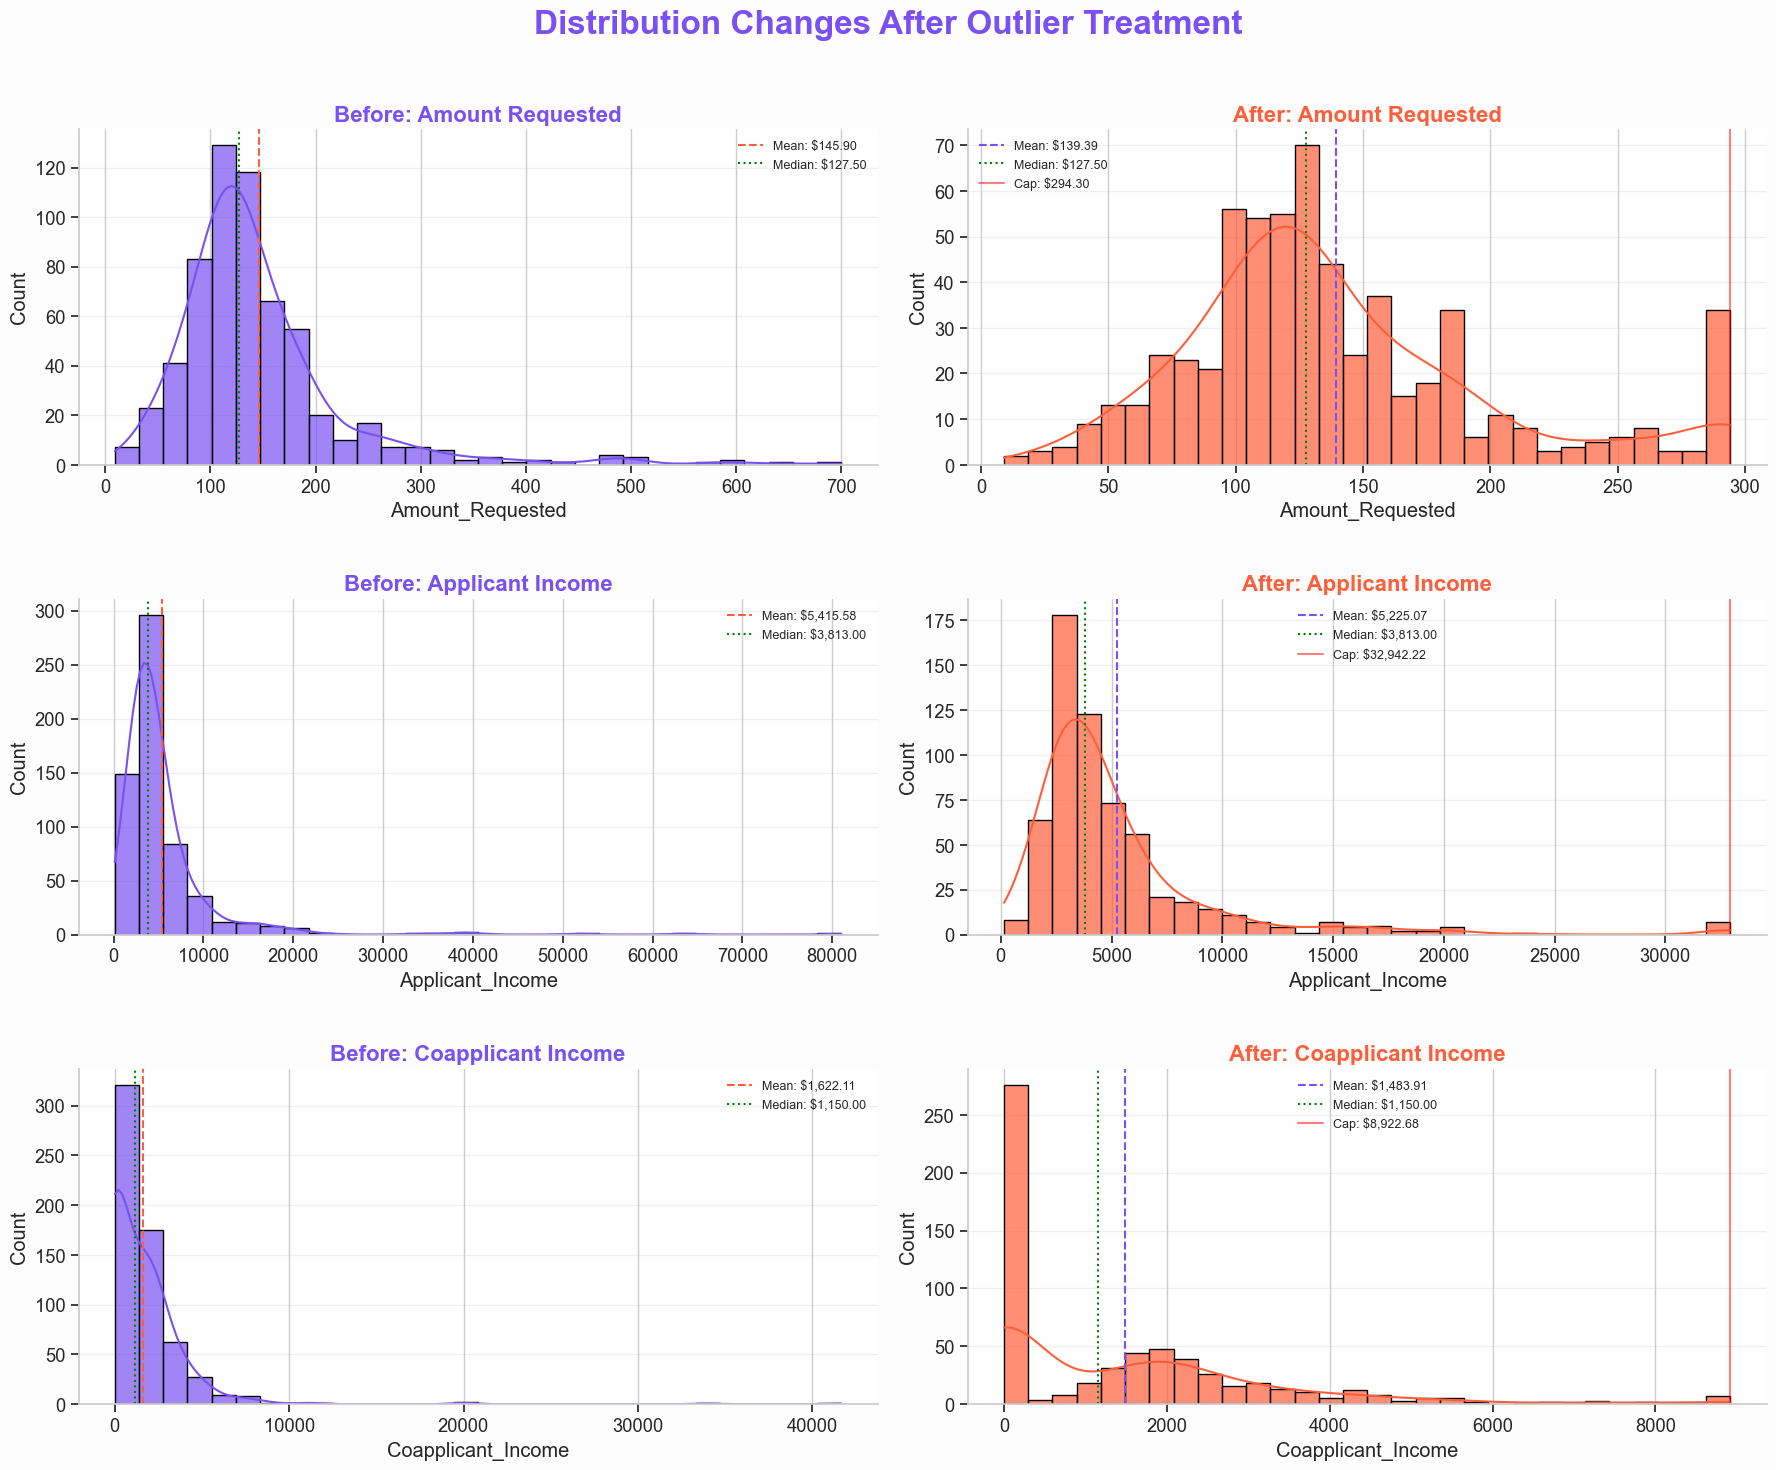


Summary of Outlier Treatment for Loan Approval Model:

Amount_Requested:
- Cap value: $294.30
- Values capped: 31 (5.1%)
- Mean change: -4.46%
- Std deviation change: -28.21%

Applicant_Income:
- Cap value: $32,942.22
- Values capped: 7 (1.1%)
- Mean change: -3.52%
- Std deviation change: -25.35%

Coapplicant_Income:
- Cap value: $8,922.68
- Values capped: 7 (1.1%)
- Mean change: -8.52%
- Std deviation change: -37.41%


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.")

# Set style and color theme
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Define the color theme
primary_purple = "#7950F2"  # Primary color
complementary_orange = "#FF5E3A"  # Complementary color
background_color = "#FDFDFD"  # Light background

# Create a copy of the DataFrame for preprocessing
df_norm = df.copy()

# Apply outlier treatment
# 1. Amount_Requested - Cap at 95th percentile
max_reasonable_loan = df['Amount_Requested'].quantile(0.95)
df_norm['Amount_Requested'] = df['Amount_Requested'].clip(upper=max_reasonable_loan)

# 2. Applicant_Income - Cap at 99th percentile
high_income_threshold = df['Applicant_Income'].quantile(0.99)
df_norm['Applicant_Income'] = df['Applicant_Income'].clip(upper=high_income_threshold)

# 3. Coapplicant_Income - Cap at 99th percentile
high_coapplicant_income = df['Coapplicant_Income'].quantile(0.99)
df_norm['Coapplicant_Income'] = df['Coapplicant_Income'].clip(upper=high_coapplicant_income)

# Visualize before and after treatment
def plot_before_after(original_data, normalized_data, columns, figsize=(18, 20)):
    """Create before and after visualization for outlier treatment"""
    fig = plt.figure(figsize=figsize, facecolor=background_color)
    
    # Add title with sufficient space
    plt.suptitle('Loan Approval Data: Before and After Outlier Treatment', 
                 fontsize=24, fontweight='bold', color=primary_purple, y=0.98)
    
    for i, col in enumerate(columns):
        # Before treatment
        plt.subplot(len(columns), 2, 2*i+1)
        ax1 = sns.boxplot(y=original_data[col], color=primary_purple, width=0.5,
                         flierprops=dict(marker='o', markerfacecolor=complementary_orange, 
                                       markersize=8, markeredgecolor='white'))
        
        # Add strip plot for distribution
        sns.stripplot(y=original_data[col], color='#333333', alpha=0.3, size=2.5, jitter=True)
        
        # Style the plot
        plt.title(f"Before: {col.replace('_', ' ')}", fontsize=16, fontweight='bold', color=primary_purple)
        plt.grid(axis='y', alpha=0.3)
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        # Calculate statistics for original data
        q1 = original_data[col].quantile(0.25)
        q3 = original_data[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        outliers_count = original_data[col][(original_data[col] > upper_bound) | 
                                          (original_data[col] < lower_bound)].count()
        
        # Add statistics annotation
        stats_text = f"Outliers: {outliers_count} ({outliers_count/len(original_data[col])*100:.1f}%)"
        plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', 
                     va='top', ha='left', fontsize=10,
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8, 
                               edgecolor=primary_purple))
        
        # After treatment
        plt.subplot(len(columns), 2, 2*i+2)
        ax2 = sns.boxplot(y=normalized_data[col], color=complementary_orange, width=0.5,
                         flierprops=dict(marker='o', markerfacecolor=primary_purple, 
                                       markersize=8, markeredgecolor='white'))
        
        # Add strip plot for distribution
        sns.stripplot(y=normalized_data[col], color='#333333', alpha=0.3, size=2.5, jitter=True)
        
        # Style the plot
        plt.title(f"After: {col.replace('_', ' ')}", fontsize=16, fontweight='bold', 
                 color=complementary_orange)
        plt.grid(axis='y', alpha=0.3)
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        # Calculate statistics for normalized data
        q1 = normalized_data[col].quantile(0.25)
        q3 = normalized_data[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        outliers_count = normalized_data[col][(normalized_data[col] > upper_bound) | 
                                          (normalized_data[col] < lower_bound)].count()
        
        # Add statistics annotation
        stats_text = f"Outliers: {outliers_count} ({outliers_count/len(normalized_data[col])*100:.1f}%)"
        plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', 
                     va='top', ha='left', fontsize=10,
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8, 
                               edgecolor=complementary_orange))
        
        # Add treatment details
        if col == 'Amount_Requested':
            treatment = f"Capped at 95th percentile: ${max_reasonable_loan:,.2f}"
        elif col == 'Applicant_Income':
            treatment = f"Capped at 99th percentile: ${high_income_threshold:,.2f}"
        elif col == 'Coapplicant_Income':
            treatment = f"Capped at 99th percentile: ${high_coapplicant_income:,.2f}"
        
        plt.annotate(treatment, xy=(0.05, 0.85), xycoords='axes fraction',
                     va='top', ha='left', fontsize=10, color='#333333',
                     bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8,
                               edgecolor=complementary_orange))
    
    # Add explanation for ML context
    plt.figtext(0.5, 0.005, 
               'Note: Even though boxplots may show similar outlier counts after treatment, extreme values are now capped,\nwhich improves machine learning model stability for loan approval prediction.',
               ha='center', fontsize=12, fontweight='bold', color='#333333')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.90, bottom=0.05, hspace=0.4)
    plt.show()

# Create histograms to better show distribution changes
def plot_distributions(original_data, normalized_data, columns, figsize=(18, 15)):
    """Create distribution comparison for before and after treatment"""
    plt.figure(figsize=figsize, facecolor=background_color)
    
    plt.suptitle('Distribution Changes After Outlier Treatment', 
                 fontsize=24, fontweight='bold', color=primary_purple, y=0.98)
    
    for i, col in enumerate(columns):
        # Before treatment
        plt.subplot(len(columns), 2, 2*i+1)
        ax1 = sns.histplot(original_data[col], kde=True, color=primary_purple, bins=30, alpha=0.7)
        
        # Style the plot
        plt.title(f"Before: {col.replace('_', ' ')}", fontsize=16, fontweight='bold', color=primary_purple)
        plt.grid(axis='y', alpha=0.3)
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        
        # Add mean and median lines
        mean_val = original_data[col].mean()
        median_val = original_data[col].median()
        plt.axvline(mean_val, color=complementary_orange, linestyle='--', 
                   label=f'Mean: ${mean_val:,.2f}')
        plt.axvline(median_val, color='green', linestyle=':', 
                   label=f'Median: ${median_val:,.2f}')
        plt.legend(fontsize=9)
        
        # After treatment
        plt.subplot(len(columns), 2, 2*i+2)
        ax2 = sns.histplot(normalized_data[col], kde=True, color=complementary_orange, bins=30, alpha=0.7)
        
        # Style the plot
        plt.title(f"After: {col.replace('_', ' ')}", fontsize=16, fontweight='bold', 
                 color=complementary_orange)
        plt.grid(axis='y', alpha=0.3)
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        
        # Add mean and median lines
        mean_val = normalized_data[col].mean()
        median_val = normalized_data[col].median()
        plt.axvline(mean_val, color=primary_purple, linestyle='--', 
                   label=f'Mean: ${mean_val:,.2f}')
        plt.axvline(median_val, color='green', linestyle=':', 
                   label=f'Median: ${median_val:,.2f}')
        plt.legend(fontsize=9)
        
        # Show capping threshold
        if col == 'Amount_Requested':
            cap_val = max_reasonable_loan
        elif col == 'Applicant_Income':
            cap_val = high_income_threshold
        elif col == 'Coapplicant_Income':
            cap_val = high_coapplicant_income
            
        plt.axvline(cap_val, color='red', linestyle='-', alpha=0.5,
                   label=f'Cap: ${cap_val:,.2f}')
        plt.legend(fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.90, bottom=0.05, hspace=0.4)
    plt.show()

# Generate the visualizations
plot_before_after(df, df_norm, ['Amount_Requested', 'Applicant_Income', 'Coapplicant_Income'])
plot_distributions(df, df_norm, ['Amount_Requested', 'Applicant_Income', 'Coapplicant_Income'])

# Print summary statistics of changes
print("\nSummary of Outlier Treatment for Loan Approval Model:")
for col in ['Amount_Requested', 'Applicant_Income', 'Coapplicant_Income']:
    # Calculate values capped
    values_capped = sum(df[col] > df_norm[col])
    percent_capped = values_capped / len(df) * 100
    
    # Calculate impact on mean
    original_mean = df[col].mean()
    new_mean = df_norm[col].mean()
    mean_change = (new_mean - original_mean) / original_mean * 100
    
    # Calculate impact on standard deviation
    original_std = df[col].std()
    new_std = df_norm[col].std()
    std_change = (new_std - original_std) / original_std * 100
    
    print(f"\n{col}:")
    print(f"- Cap value: ${df_norm[col].max():,.2f}")
    print(f"- Values capped: {values_capped} ({percent_capped:.1f}%)")
    print(f"- Mean change: {mean_change:.2f}%")
    print(f"- Std deviation change: {std_change:.2f}%")

## Explanation for Outlier Strategy
### Domain-specific approach to outlier treatment that's optimized for loan approval modeling:
* Amount_Requested: Capped at the 95th percentile to reflect real-world banking policies where maximum loan amounts exist.
* Applicant_Income and Coapplicant_Income: Capped at the 99th percentile to preserve most income variations while preventing extreme values from skewing the model.
### Approach Rationale: Rather than removing outliers (which loses data) or using statistical transformations (which can distort financial relationships), I used percentile-based capping that:
* Maintains the overall data distribution
* Preserves the majority of data points
* Limits the influence of extreme values on model training

## 2.2.3 Removing Irrelevant Variable(s)
To improve model performance, we remove features that do not contribute to loan approval prediction.
* Irrelevant Feature to Drop
    *Loan_ID → A unique identifier with no predictive value.

In [44]:
df_norm.drop(columns=['Loan_ID'], inplace=True)

#### Check if the Loan ID column has been removed already

In [46]:
df_norm.head()

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval_Status
0,Male,Yes,0.0,Graduate,No,9329.0,0.0,Rural,189.0,180.0,1,Y
1,Male,Yes,2.0,Graduate,No,2043.0,1619.0,Rural,102.0,360.0,1,Y
2,Male,Yes,0.0,Graduate,No,4754.0,2331.0,Urban,129.0,360.0,1,Y
3,Male,No,0.0,Not Graduate,No,2721.0,0.0,Urban,59.0,180.0,1,Y
4,Male,Yes,0.0,Graduate,No,2998.0,3419.0,Semiurban,56.0,180.0,1,Y


# 2.3 Visualise distributions, relationships, and patterns in the data to gain insights. 

## 2.3.1 Visualise distributions

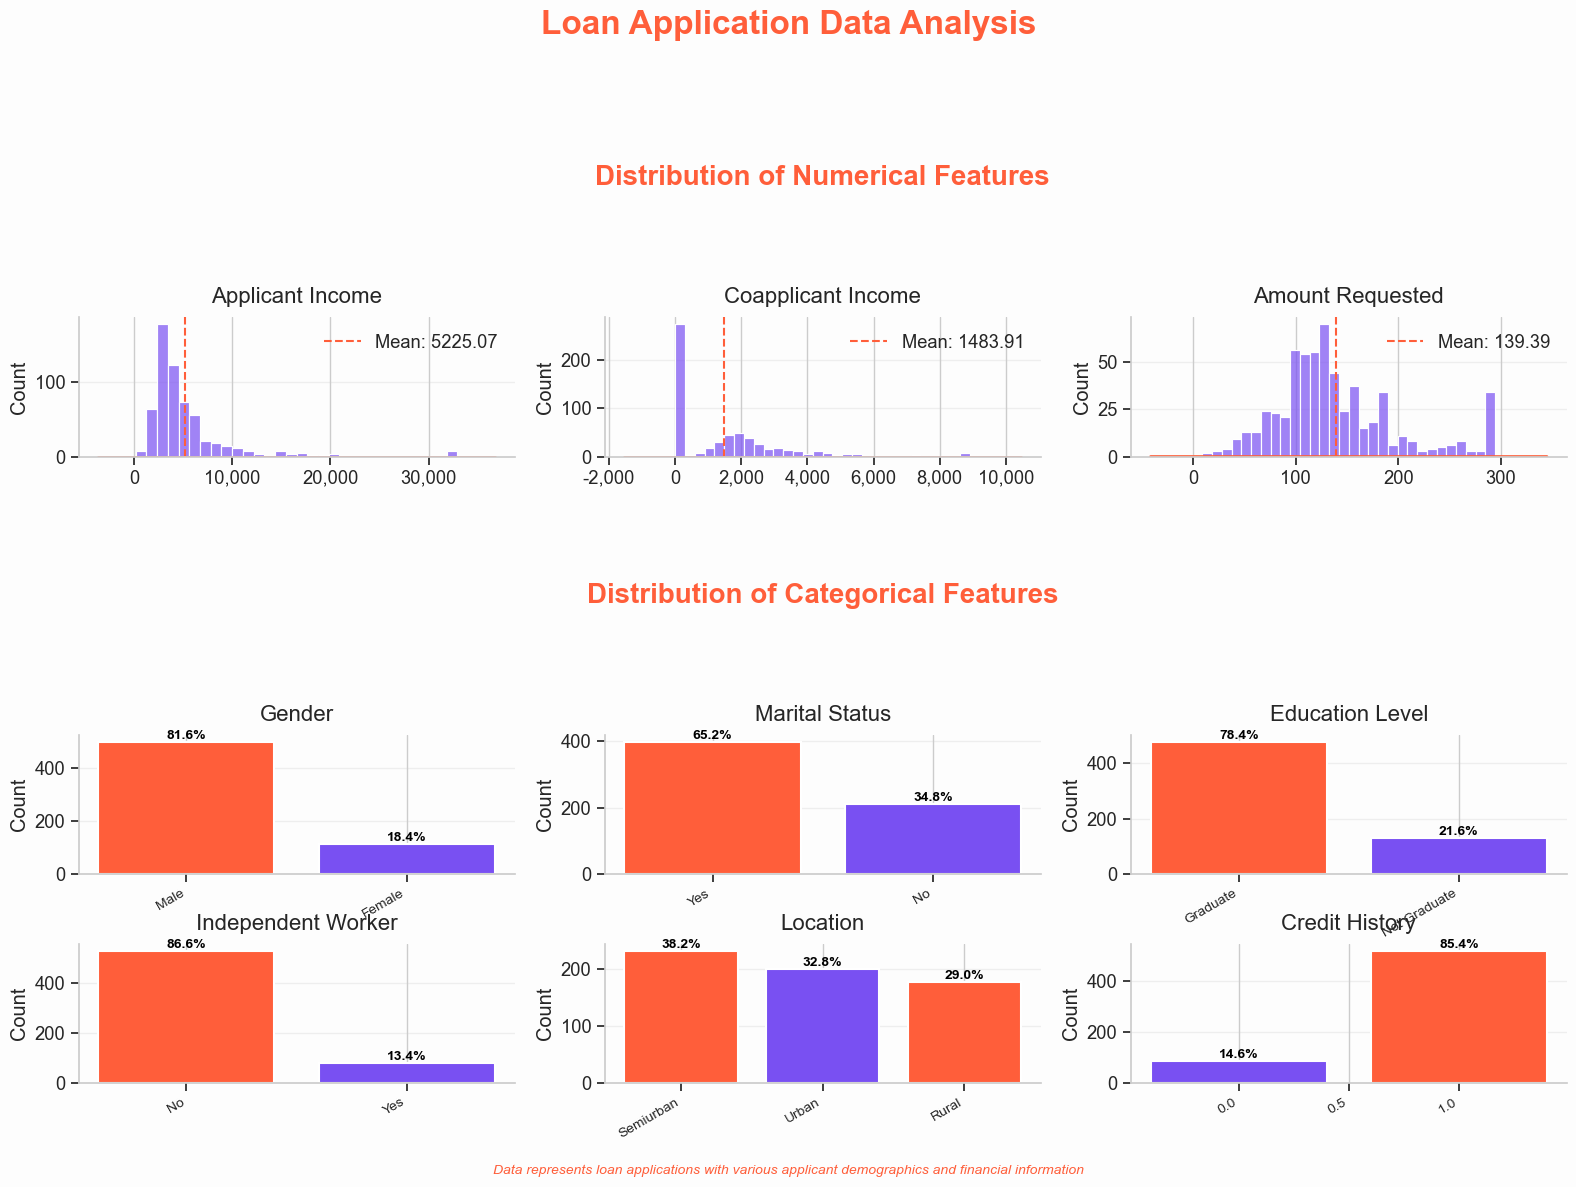

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Custom color palettes
numerical_color = "#7950F2"  # Purple (complementary)
mean_line_color = "#FF5E3A"  # Orange (primary)
neutral_color = "#FDFDFD"    # Off-White (neutral)
categorical_palette = ["#FF5E3A", "#7950F2"]  # Primary color first

# Update the background color to off-white
plt.rcParams['figure.facecolor'] = '#FDFDFD'
plt.rcParams['axes.facecolor'] = '#FDFDFD'

# Define numerical columns for distribution visualization
numerical_cols = ['Applicant_Income', 'Coapplicant_Income', 'Amount_Requested']

# Define categorical columns for bar plots - we'll dynamically create enough subplots
categorical_cols = ['Gender', 'Marital_Status', 'Education_Level', 
                    'Independent_Worker', 'Location', 'Credit_History']

# Calculate layout dimensions
num_categorical = len(categorical_cols)
cat_rows = (num_categorical + 2) // 3  # 3 plots per row, rounded up
total_rows = 3 + cat_rows  # 1 for num title, 1 for num plots, 1 for cat title, the rest for cat plots

# Create a figure with dynamic grid layout
fig = plt.figure(figsize=(16, 4 + 4 * cat_rows))  # Base height + height per categorical row
gs = gridspec.GridSpec(total_rows, 6, figure=fig)

# Title for the entire visualization
fig.suptitle('Loan Application Data Analysis', fontsize=24, y=0.98, fontweight='bold', color='#FF5E3A')

# NUMERICAL DISTRIBUTIONS SECTION
# Create a subplot for numerical variables title
num_title_ax = fig.add_subplot(gs[0, :])
num_title_ax.text(0.5, 0.5, 'Distribution of Numerical Features', 
                 ha='center', va='center', fontsize=20, fontweight='bold', color='#FF5E3A')
num_title_ax.set_axis_off()

# Create subplots for numerical columns with more elegant histograms
for i, col in enumerate(numerical_cols):
    ax = fig.add_subplot(gs[1, i*2:(i+1)*2])
    
    # Simple histogram
    sns.histplot(df_norm[col], bins=30, ax=ax, color=numerical_color, 
                 edgecolor='white', alpha=0.7)
    
    # Add a separate KDE plot on the same axis
    sns.kdeplot(df_norm[col], ax=ax, color=mean_line_color, linewidth=2)
    
    # Add a vertical line for the mean
    mean_val = df_norm[col].mean()
    ax.axvline(mean_val, color=mean_line_color, linestyle='--', linewidth=1.5, 
               label=f'Mean: {mean_val:.2f}')
    
    # Format the subplot
    ax.set_title(f"{col.replace('_', ' ')}", fontsize=16, pad=10)
    ax.grid(axis='y', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')
    
    # Format numbers with comma separators for better readability
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # Add legend
    ax.legend(frameon=False)

# CATEGORICAL DISTRIBUTIONS SECTION
# Create a subplot for categorical variables title
cat_title_ax = fig.add_subplot(gs[2, :])
cat_title_ax.text(0.5, 0.5, 'Distribution of Categorical Features', 
                 ha='center', va='center', fontsize=20, fontweight='bold', color='#FF5E3A')
cat_title_ax.set_axis_off()

# Create subplots for categorical features with improved bar charts
for i, col in enumerate(categorical_cols):
    # Calculate position: 3 plots per row
    row = i // 3
    col_pos = i % 3
    
    # Row index starts at 3 (after numerical section)
    ax = fig.add_subplot(gs[3 + row, col_pos*2:(col_pos+1)*2])
    
    # Count the values for percentage calculation
    value_counts = df_norm[col].value_counts()
    total = len(df_norm[col])
    
    # Create bar plot with alternating colors
    colors = [mean_line_color, numerical_color] * (len(value_counts) // 2 + 1)  # Alternate colors
    bars = ax.bar(value_counts.index, value_counts.values, 
                 color=colors[:len(value_counts)],
                 edgecolor='white', linewidth=1.5)
    
    # Add percentage labels on top of bars
    for j, p in enumerate(bars):
        height = p.get_height()
        percentage = 100 * value_counts.values[j] / total
        ax.annotate(f'{percentage:.1f}%', 
                   (p.get_x() + p.get_width()/2., height), 
                   ha='center', va='bottom', fontsize=10, color='black',
                   fontweight='bold')
    
    # Customize subplot appearance
    ax.set_title(f"{col.replace('_', ' ')}", fontsize=16, pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.grid(axis='y', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Rotate labels if needed and adjust font size
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Add a source note or description at the bottom
fig.text(0.5, 0.01, 'Data represents loan applications with various applicant demographics and financial information', 
         ha='center', fontsize=10, style='italic', color='#FF5E3A')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.subplots_adjust(hspace=0.5)  # Increased spacing between subplots

# Save the figure with high DPI for better quality
plt.savefig('loan_application_analysis.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## 2.3.2 Visualize relationships

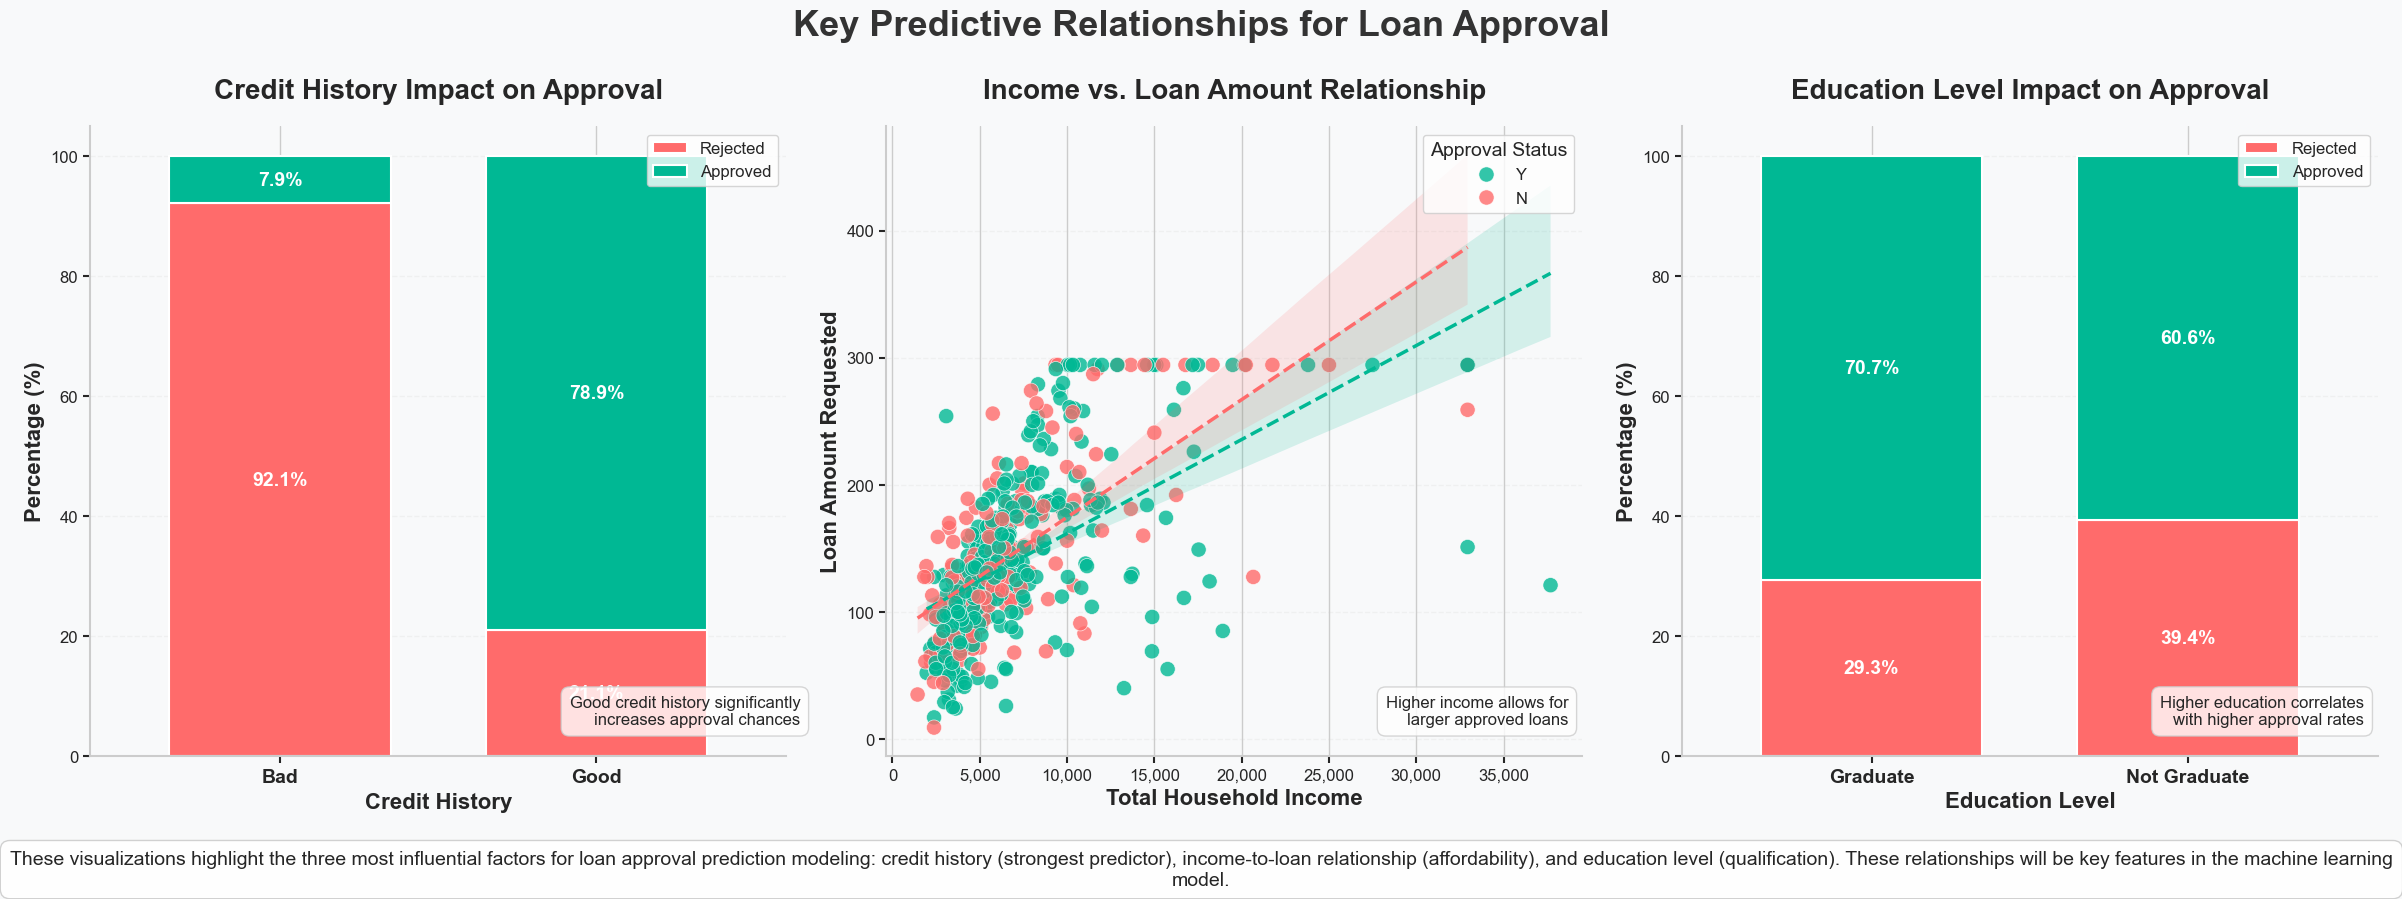

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Set a modern, professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.3)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# Define an enhanced color scheme for better visualization
approval_colors = {"Y": "#00B894", "N": "#FF6B6B"}  # More vibrant green and red
primary_color = "#7950F2"
accent_color = "#FF5E3A"
background_color = "#F8F9FA"

# Create a custom gradient colormap for backgrounds
custom_cmap = LinearSegmentedColormap.from_list("custom", [background_color, "#E9ECEF"])

# Enhanced styling function
def style_plot(ax, title):
    """Apply enhanced styling to plots"""
    ax.set_title(title, fontsize=20, fontweight='bold', pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.grid(axis='y', alpha=0.2, linestyle='--')
    ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=5)
    ax.set_facecolor(background_color)
    return ax

# Calculate Total_Income if needed
if 'Total_Income' not in df_norm.columns:
    df_norm['Total_Income'] = df_norm['Applicant_Income'] + df_norm['Coapplicant_Income']

# Create Debt-to-Income ratio if needed
if 'Debt_To_Income' not in df_norm.columns:
    df_norm['Debt_To_Income'] = (df_norm['Amount_Requested'] / df_norm['Total_Income']) * 100
    df_norm['Debt_To_Income'] = df_norm['Debt_To_Income'].clip(upper=800)

# Create figure with enhanced spacing
fig, axes = plt.subplots(1, 3, figsize=(24, 9), facecolor=background_color)
plt.subplots_adjust(wspace=0.2)  # Add more space between plots

# 1. Credit History vs. Approval Status - With enhanced design
credit_approval = pd.crosstab(df_norm['Credit_History'], df_norm['Approval_Status'], normalize='index') * 100
ax0 = credit_approval.plot(
    kind='bar', 
    stacked=True, 
    ax=axes[0], 
    color=[approval_colors["N"], approval_colors["Y"]],
    width=0.7,
    edgecolor='white',
    linewidth=1.5
)
style_plot(axes[0], 'Credit History Impact on Approval')
axes[0].set_xlabel('Credit History', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Percentage (%)', fontsize=16, fontweight='bold')

# Better labeling for Credit History
current_ticks = [item.get_text() for item in axes[0].get_xticklabels()]
tick_labels = []
for tick in current_ticks:
    if tick == '0' or tick == '0.0':
        tick_labels.append('Bad')
    elif tick == '1' or tick == '1.0':
        tick_labels.append('Good')
    else:
        tick_labels.append('Moderate')

axes[0].set_xticklabels(tick_labels, rotation=0, fontsize=14, fontweight='bold')
legend = axes[0].legend(['Rejected', 'Approved'], frameon=True, fontsize=12)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#CCCCCC')

# Add percentage labels with better positioning and styling
for container in axes[0].containers:
    axes[0].bar_label(
        container, 
        fmt='%.1f%%', 
        label_type='center',
        fontsize=14,
        fontweight='bold',
        color='white'
    )

# Add annotation explaining the relationship
axes[0].annotate(
    "Good credit history significantly\nincreases approval chances",
    xy=(1.02, 0.05), 
    xycoords='axes fraction',
    fontsize=12,
    ha='right',
    bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8, edgecolor='#CCCCCC')
)

# 2. Total Income vs. Loan Amount by Approval Status - With visual enhancements
scatter = sns.scatterplot(
    x='Total_Income',
    y='Amount_Requested',
    hue='Approval_Status',
    palette=approval_colors,
    s=120,
    alpha=0.8,
    edgecolor='white',
    linewidth=0.5,
    data=df_norm,
    ax=axes[1]
)

# Add regression lines with confidence intervals
for status, color in approval_colors.items():
    subset = df_norm[df_norm['Approval_Status'] == status]
    if len(subset) > 1:  # Only if we have enough data
        sns.regplot(
            x='Total_Income',
            y='Amount_Requested',
            data=subset,
            scatter=False,
            ax=axes[1],
            line_kws={'linestyle': '--', 'linewidth': 2.5, 'color': color},
            ci=90  # Add confidence interval
        )

style_plot(axes[1], 'Income vs. Loan Amount Relationship')
axes[1].set_xlabel('Total Household Income', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Loan Amount Requested', fontsize=16, fontweight='bold')

# Format x-axis labels with commas for readability
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))

# Enhanced legend
legend = axes[1].legend(title='Approval Status', frameon=True, fontsize=12, title_fontsize=14)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#CCCCCC')

# Add annotation explaining the pattern
axes[1].annotate(
    "Higher income allows for\nlarger approved loans",
    xy=(0.98, 0.05), 
    xycoords='axes fraction',
    fontsize=12,
    ha='right',
    bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8, edgecolor='#CCCCCC')
)

# 3. Education Level vs. Approval Rate - With enhanced visual appeal
education_approval = pd.crosstab(df_norm['Education_Level'], df_norm['Approval_Status'], normalize='index') * 100
education_approval.plot(
    kind='bar', 
    stacked=True, 
    ax=axes[2], 
    color=[approval_colors["N"], approval_colors["Y"]],
    width=0.7,
    edgecolor='white',
    linewidth=1.5
)
style_plot(axes[2], 'Education Level Impact on Approval')
axes[2].set_xlabel('Education Level', fontsize=16, fontweight='bold')
axes[2].set_ylabel('Percentage (%)', fontsize=16, fontweight='bold')
    
# Enhance x-tick labels
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0, fontsize=14, fontweight='bold')
legend = axes[2].legend(['Rejected', 'Approved'], frameon=True, fontsize=12)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('#CCCCCC')

# Add percentage labels with better positioning and styling
for container in axes[2].containers:
    axes[2].bar_label(
        container, 
        fmt='%.1f%%', 
        label_type='center',
        fontsize=14,
        fontweight='bold',
        color='white'
    )

# Add annotation explaining the relationship
axes[2].annotate(
    "Higher education correlates\nwith higher approval rates",
    xy=(0.98, 0.05), 
    xycoords='axes fraction',
    fontsize=12,
    ha='right',
    bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8, edgecolor='#CCCCCC')
)

# Add overall title with more prominence
fig.suptitle('Key Predictive Relationships for Loan Approval', 
             fontsize=26, fontweight='bold', y=0.98, color='#333333')

# Add enhanced description text
description = (
    'These visualizations highlight the three most influential factors for loan approval prediction modeling: '
    'credit history (strongest predictor), income-to-loan relationship (affordability), and education level '
    '(qualification). These relationships will be key features in the machine learning model.'
)

plt.figtext(0.5, 0.01, description, ha='center', fontsize=14, wrap=True, 
           bbox=dict(facecolor='white', alpha=0.9, edgecolor='#CCCCCC', boxstyle='round,pad=0.5'))

# Final layout adjustments
plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.15)

# Save high resolution image with enhanced title
plt.savefig('loan_approval_predictive_relationships.png', dpi=300, bbox_inches='tight', facecolor=background_color)
plt.show()

This visualization highlights loan approval's key predictors:

* Credit History: Good credit history increases approval chances dramatically (78.9% vs 7.9%)
* Income-Loan Relationship: Higher income enables larger approved loans with distinct approval patterns
* Education: Graduates enjoy higher approval rates (70.7%) than non-graduates (60.6%)

These three relationships will be critical features for the loan approval prediction model.

## 2.3.3 Visualize patterns

### Add-on: To better visualize patterns, I will encode categorical variables to numerical values.

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a copy of the normalized dataframe for encoding
df_encoded = df_norm.copy()

# 1. Binary variables - use simple mapping (0,1)
# These have clear binary meaning and direct numerical interpretation
binary_mapping = {'No': 0, 'Yes': 1, 'Male': 0, 'Female': 1, 
                 'Not Graduate': 0, 'Graduate': 1, 
                 'N': 0, 'Y': 1}

# Apply binary mappings
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})
df_encoded['Marital_Status'] = df_encoded['Marital_Status'].map({'No': 0, 'Yes': 1})
df_encoded['Education_Level'] = df_encoded['Education_Level'].map({'Not Graduate': 0, 'Graduate': 1})
df_encoded['Independent_Worker'] = df_encoded['Independent_Worker'].map({'No': 0, 'Yes': 1})
df_encoded['Approval_Status'] = df_encoded['Approval_Status'].map({'N': 0, 'Y': 1})

# 2. Number_of_Dependents - already numeric, no encoding needed
# Credit_History is also already numeric

# 3. Location - use one-hot encoding (non-ordinal categorical)
# Creating dummies with drop_first=True to avoid multicollinearity
location_dummies = pd.get_dummies(df_encoded['Location'], prefix='Location', drop_first=True)
# Convert boolean True/False to integers 1/0
location_dummies = location_dummies.astype(int)
df_encoded = pd.concat([df_encoded, location_dummies], axis=1)
df_encoded.drop('Location', axis=1, inplace=True)

# 4. Term - special handling for loan terms
# Option 1: Keep as is (if it represents months, it's already numeric)
# Option 2: Convert to years for better scale with other features
df_encoded['Term_Years'] = df_encoded['Term'] / 12
df_encoded.drop('Term', axis=1, inplace=True)

# 5. Create a pipeline for future data processing
# This helps maintain consistency between training and inference
categorical_features = ['Gender', 'Marital_Status', 'Education_Level', 'Independent_Worker']
location_feature = ['Location']
numeric_features = ['Number_of_Dependents', 'Credit_History', 'Amount_Requested', 
                   'Applicant_Income', 'Coapplicant_Income', 'Term']

# Define the preprocessing for future use
preprocessing = ColumnTransformer(
    transformers=[
        ('binary', 'passthrough', categorical_features),
        ('location', OneHotEncoder(drop='first', dtype=int), location_feature),
        ('numeric', 'passthrough', numeric_features)
    ],
    remainder='drop'  # Drop any columns not specified
)

# Function to apply encodings to new data
def encode_loan_data(new_data):
    """
    Encode new loan application data using the same transformations
    
    Parameters:
    new_data (DataFrame): DataFrame with the same columns as the original dataset
    
    Returns:
    DataFrame: Encoded DataFrame ready for model prediction
    """
    encoded_data = new_data.copy()
    
    # Apply binary encodings
    for col, mapping in binary_mapping.items():
        if col in encoded_data.columns:
            encoded_data[col] = encoded_data[col].map(binary_mapping)
    
    # One-hot encode location
    if 'Location' in encoded_data.columns:
        loc_dummies = pd.get_dummies(encoded_data['Location'], prefix='Location', drop_first=True)
        loc_dummies = loc_dummies.astype(int)  # Ensure integer type, not boolean
        encoded_data = pd.concat([encoded_data, loc_dummies], axis=1)
        encoded_data.drop('Location', axis=1, inplace=True)
    
    # Convert Term to years
    if 'Term' in encoded_data.columns:
        encoded_data['Term_Years'] = encoded_data['Term'] / 12
        encoded_data.drop('Term', axis=1, inplace=True)
    
    return encoded_data


# Print encoding reference for categorical variables
print("\n===== ENCODING REFERENCE =====")
print("\n1. Binary Variables (Original → Encoded)")
print("Gender:")
print("  Male → 0")
print("  Female → 1")

print("\nMarital_Status:")
print("  No → 0")
print("  Yes → 1")

print("\nEducation_Level:")
print("  Not Graduate → 0")
print("  Graduate → 1")

print("\nIndependent_Worker:")
print("  No → 0")
print("  Yes → 1")

print("\nApproval_Status:")
print("  N → 0")
print("  Y → 1")

print("\n2. Credit_History:")
print("  [Already numerical: 0, 1]")

print("\n3. Number_of_Dependents:")
print("  [Already numerical: 0, 1, 2, 3]")

print("\n4. Location (One-Hot Encoded as integers, not booleans):")
print("  Rural → [0,0] (base category)")
print("  Urban → [1,0]")
print("  Semiurban → [0,1]")

print("\n5. Term:")
print("  Original (months): [12, 36, 60, 84, 120, 180, 240, 300, 360, 480]")
print("  Encoded: Term_Years = Term / 12")
print("  Example: 360 months → 30 years")

# Check data types to confirm integers for one-hot columns
print("\n===== COLUMN DATA TYPES =====")
print(df_encoded.dtypes)

# Summarize the encoding transformation
print("\n===== ENCODING SUMMARY =====")
print(f"Original columns: {list(df_norm.columns)}")
print(f"Encoded columns: {list(df_encoded.columns)}")
print(f"Number of features after encoding: {len(df_encoded.columns)}")

# Count of target variable distribution (useful for checking class imbalance)
if 'Approval_Status' in df_encoded.columns:
    approval_counts = df_encoded['Approval_Status'].value_counts()
    print("\nTarget Variable Distribution:")
    print(f"Approved loans: {approval_counts.get(1, 0)} ({approval_counts.get(1, 0)/len(df_encoded)*100:.2f}%)")
    print(f"Rejected loans: {approval_counts.get(0, 0)} ({approval_counts.get(0, 0)/len(df_encoded)*100:.2f}%)")


===== ENCODING REFERENCE =====

1. Binary Variables (Original → Encoded)
Gender:
  Male → 0
  Female → 1

Marital_Status:
  No → 0
  Yes → 1

Education_Level:
  Not Graduate → 0
  Graduate → 1

Independent_Worker:
  No → 0
  Yes → 1

Approval_Status:
  N → 0
  Y → 1

2. Credit_History:
  [Already numerical: 0, 1]

3. Number_of_Dependents:
  [Already numerical: 0, 1, 2, 3]

4. Location (One-Hot Encoded as integers, not booleans):
  Rural → [0,0] (base category)
  Urban → [1,0]
  Semiurban → [0,1]

5. Term:
  Original (months): [12, 36, 60, 84, 120, 180, 240, 300, 360, 480]
  Encoded: Term_Years = Term / 12
  Example: 360 months → 30 years

===== COLUMN DATA TYPES =====
Gender                    int64
Marital_Status            int64
Number_of_Dependents    float64
Education_Level           int64
Independent_Worker        int64
Applicant_Income        float64
Coapplicant_Income      float64
Amount_Requested        float64
Credit_History            int64
Approval_Status           int64
To

### Explanation on Encoding Strategy
* I copied df_norm to df_encoded
* I mapped text values to numbers:
    * Binary fields: Yes/No → 1/0, Male/Female → 0/1, etc.
    * Location: Used one-hot encoding with Rural as baseline
    * Term: Converted months to years
* I created a pipeline for future preprocessing
* I printed a reference guide for all encodings
* I summarized column changes and approval rates

    

### Explanation on Encoding Strategy

* I mapped categorical values to numbers:
    
    * Binary fields (Yes/No → 1/0, Male/Female → 0/1):
        * Simple binary encoding works well for variables with two categories
        * The mapping is intuitive and preserves the binary nature of the data
        * For gender, Male=0 and Female=1 is arbitrary but consistent

    * Location (One-hot with Rural as baseline):
        * Location has 3 categories with no inherent order (non-ordinal)
        * One-hot encoding creates a separate column for each category (except the baseline)
        * Rural was chosen as the baseline (dropped column) to avoid multicollinearity
        * When Rural=1, both Location_Urban and Location_Semiurban are 0

    * Term (Months to years):
        * Term was already numeric (in months)
        * Converting to years improves the scale relative to other features
        * Many ML algorithms work better when features are on similar scales
        * This preserves the meaning while making the values more manageable

* Also, I created a pipeline for future ML preprocessing


#### Verify if all categorical variables have been encoded into numerical value

In [59]:
df_encoded.head()

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Amount_Requested,Credit_History,Approval_Status,Total_Income,Debt_To_Income,Location_Semiurban,Location_Urban,Term_Years
0,0,1,0.0,1,0,9329.0,0.0,189.0,1,1,9329.0,2.025941,0,0,15.0
1,0,1,2.0,1,0,2043.0,1619.0,102.0,1,1,3662.0,2.785363,0,0,30.0
2,0,1,0.0,1,0,4754.0,2331.0,129.0,1,1,7085.0,1.820748,0,1,30.0
3,0,0,0.0,0,0,2721.0,0.0,59.0,1,1,2721.0,2.168320,0,1,15.0
4,0,1,0.0,1,0,2998.0,3419.0,56.0,1,1,6417.0,0.872682,1,0,15.0


### Now, we can now better visualize patterns for the data.

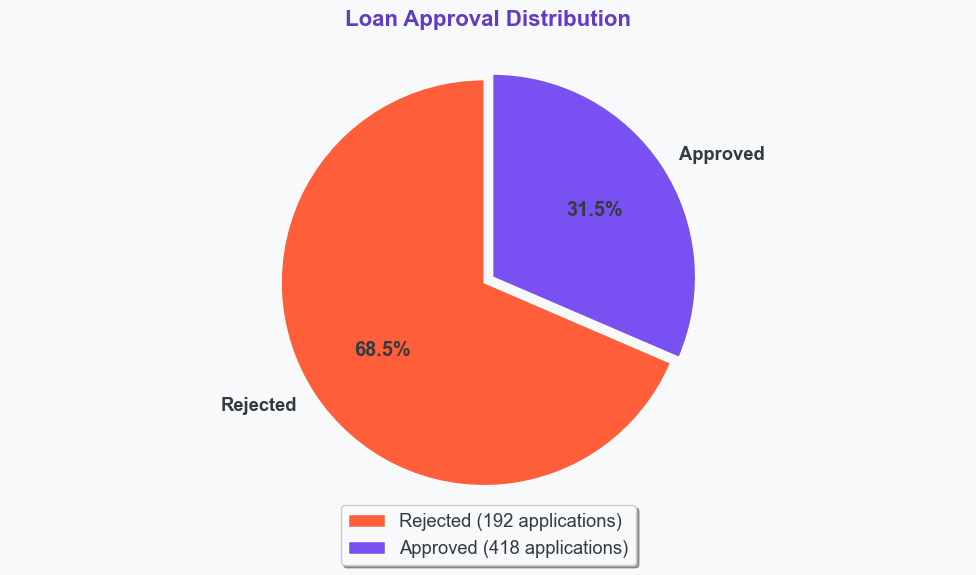

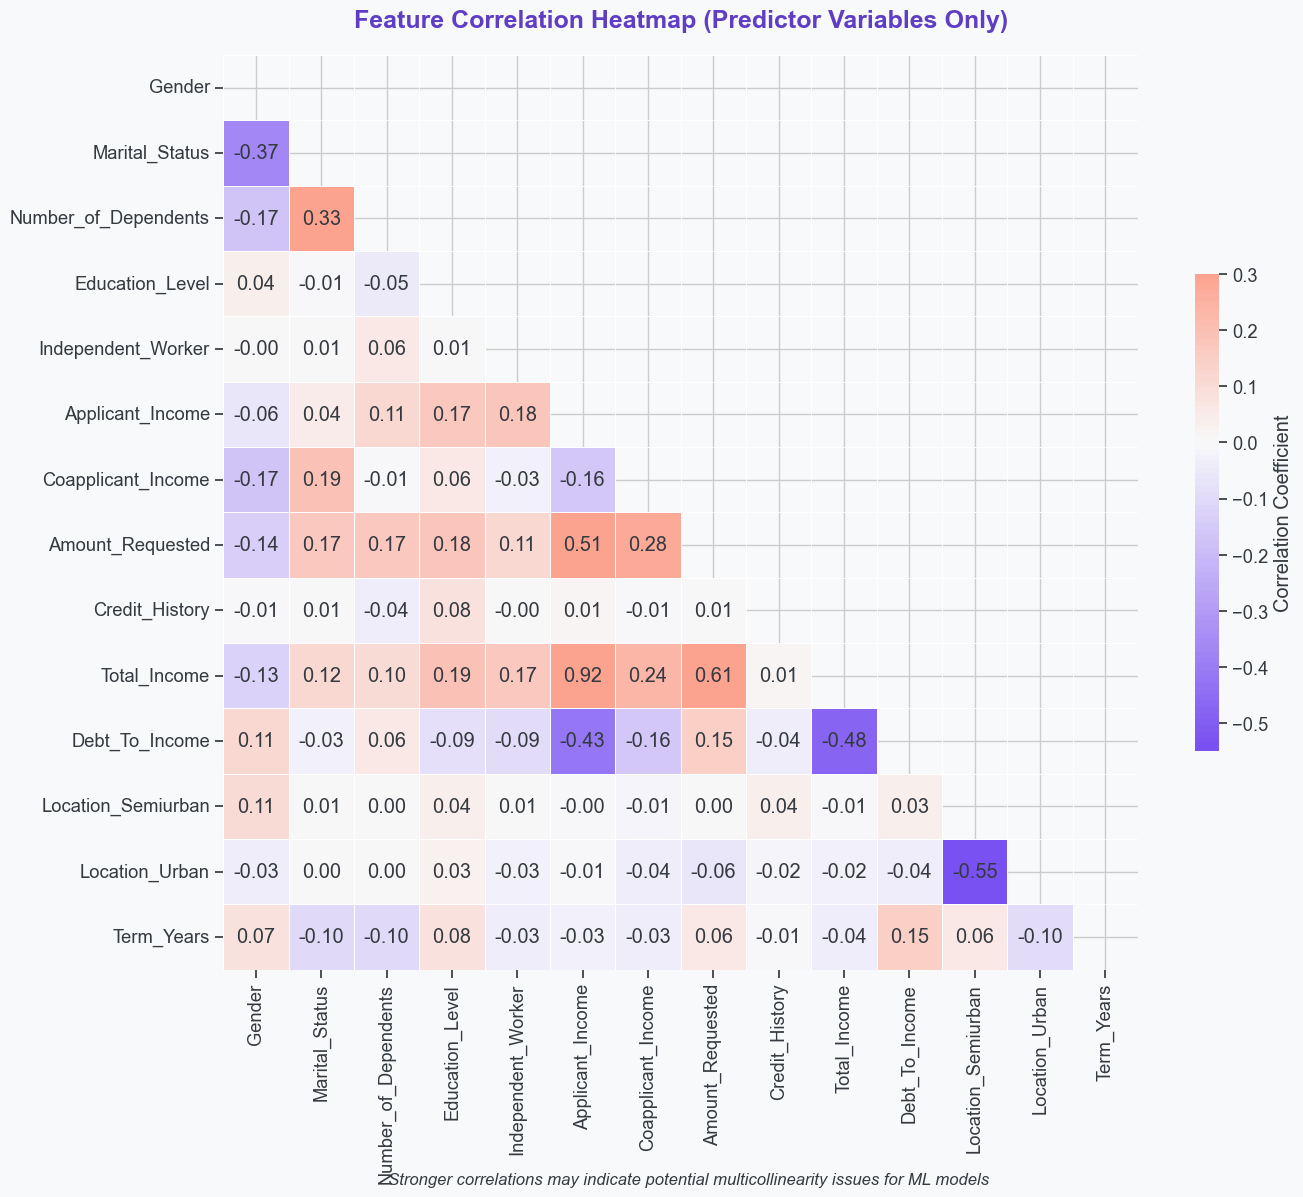

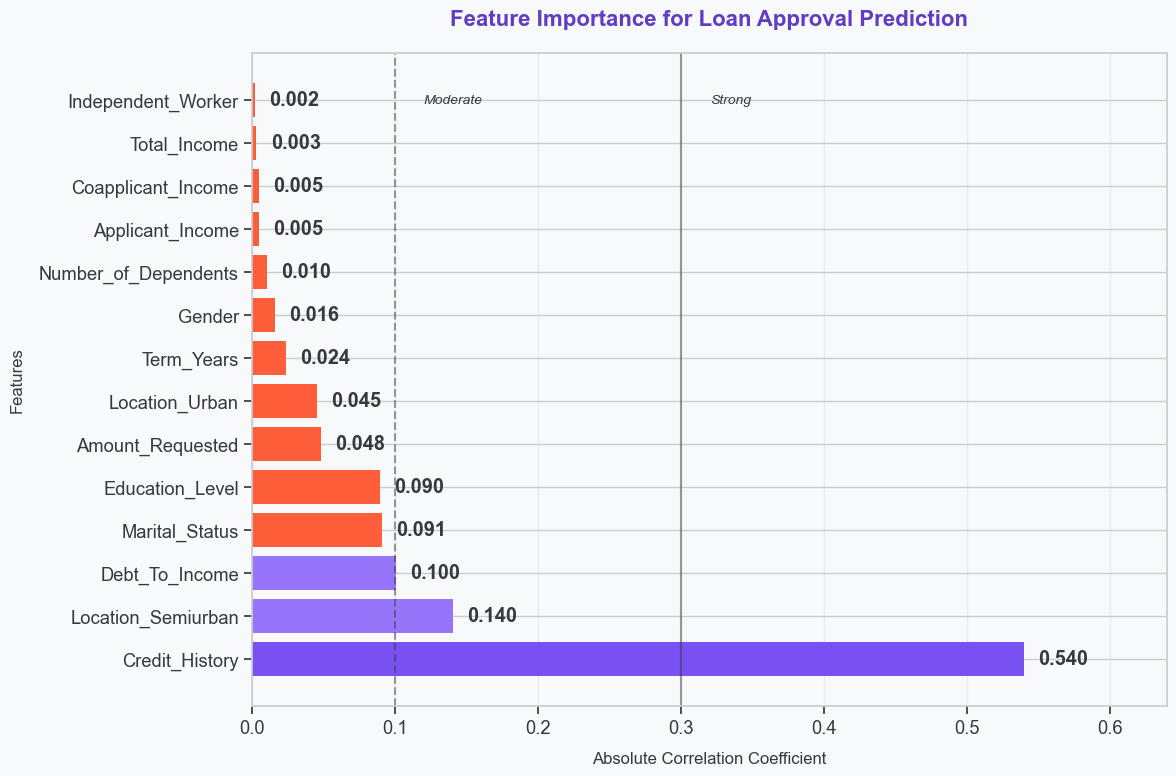

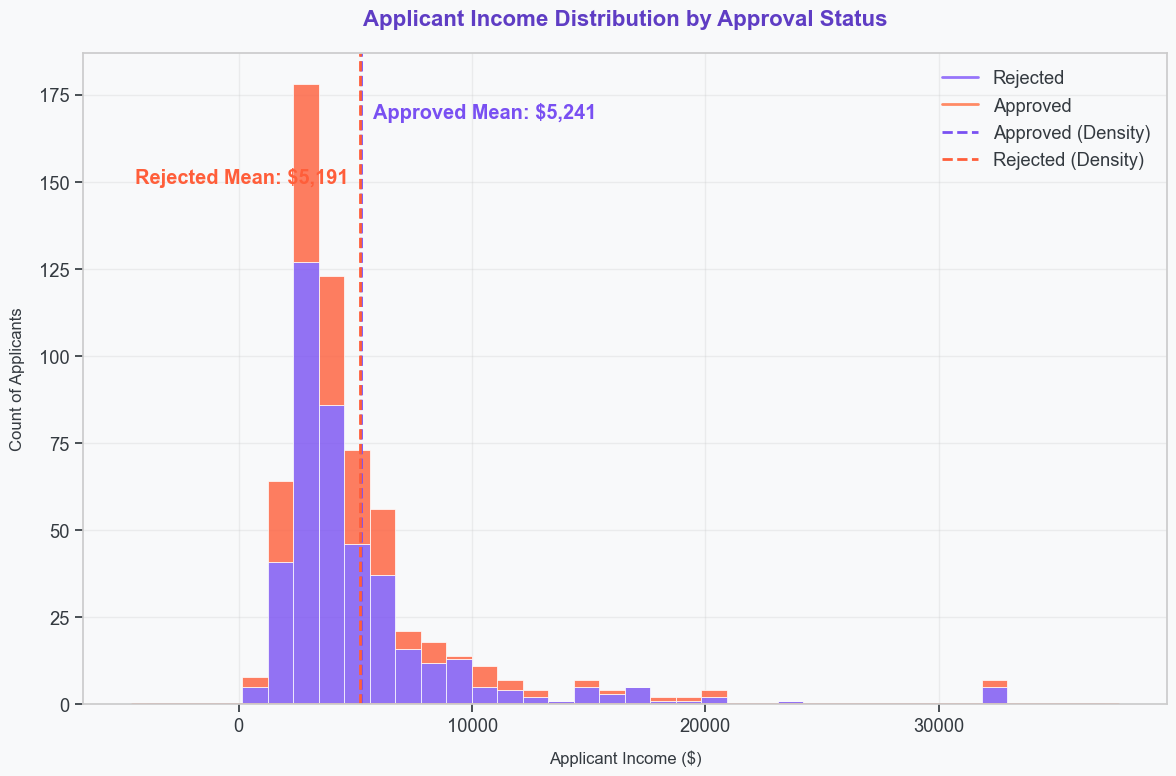


===== DATA STATISTICS SUMMARY =====

Based on the provided data, here are some key statistics:

1. Top 5 features by correlation with loan approval:
   - Credit_History: 0.540
   - Location_Semiurban: 0.140
   - Debt_To_Income: 0.100
   - Marital_Status: 0.091
   - Education_Level: 0.090

2. Credit History Statistics:
   - Credit History 0: 7.9% approval rate
   - Credit History 1: 78.9% approval rate

3. Income Statistics by Approval:
   - Rejected: Mean=$5191.11, Median=$3833.50
   - Approved: Mean=$5240.67, Median=$3813.00


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Set style for matplotlib visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Define color palette based on brand colors
primary_purple = "#7950F2"  # Primary brand color
complementary_orange = "#FF5E3A"  # Complementary brand color

# Create extended color palette for consistent styling
light_purple = "#9775FA"  # Lighter shade of primary
dark_purple = "#5F3DC4"  # Darker shade of primary
light_orange = "#FF8A65"  # Lighter shade of complementary
light_gray = "#F8F9FA"  # Light background color
dark_gray = "#343A40"  # Text color

# Create custom colormap for heatmaps with exact brand colors for high and low values
colors = [primary_purple, light_gray, complementary_orange]  
cmap_name = 'PurpleOrange'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# Set default colors
plt.rcParams['figure.facecolor'] = light_gray
plt.rcParams['axes.facecolor'] = light_gray
plt.rcParams['text.color'] = dark_gray
plt.rcParams['axes.labelcolor'] = dark_gray
plt.rcParams['xtick.color'] = dark_gray
plt.rcParams['ytick.color'] = dark_gray

# Use the encoded dataframe for pattern visualization
df_patterns = df_encoded.copy()

# 1. Target Distribution Visualization (Pie Chart)
plt.figure(figsize=(10, 6), facecolor=light_gray)
approval_counts = df_patterns['Approval_Status'].value_counts()
colors = [complementary_orange, primary_purple]
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
plt.pie(approval_counts, labels=['Rejected', 'Approved'], autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=(0.05, 0), 
        shadow=False, wedgeprops=wedgeprops, textprops={'color': dark_gray, 'fontweight': 'bold'})
plt.title('Loan Approval Distribution', fontsize=16, fontweight='bold', color=dark_purple, pad=20)

# Add a fancy legend with counts
plt.legend(
    [f'Rejected ({approval_counts[0]} applications)', f'Approved ({approval_counts[1]} applications)'],
    loc='lower center', 
    bbox_to_anchor=(0.5, -0.15),
    frameon=True,
    shadow=True,
    facecolor=light_gray
)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Feature Correlation Heatmap (excluding target variable)
plt.figure(figsize=(14, 12), facecolor=light_gray)

# Create correlation matrix without Approval_Status
features_df = df_patterns.drop('Approval_Status', axis=1)
correlation = features_df.corr()
mask = np.triu(correlation)

# Using our custom colormap
heatmap = sns.heatmap(correlation, mask=mask, cmap=cm, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', 
            cbar_kws={"shrink": .5, "label": "Correlation Coefficient"}, 
            annot_kws={"color": dark_gray})

plt.title('Feature Correlation Heatmap (Predictor Variables Only)', 
         fontsize=18, fontweight='bold', pad=20, color=dark_purple)

# Add annotation explaining potential multicollinearity
plt.figtext(0.5, 0.01, 'Stronger correlations may indicate potential multicollinearity issues for ML models', 
           ha='center', fontsize=12, fontstyle='italic')

plt.tight_layout()
plt.show()

# 3. Feature Importance (based on correlation with target)
# Calculate correlation including Approval_Status
full_correlation = df_patterns.corr()
correlation_with_target = abs(full_correlation['Approval_Status']).sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop('Approval_Status')  # Remove self-correlation

# Custom color gradient based on correlation values
feature_colors = []
for value in correlation_with_target.values:
    if value > 0.3:  # Strong correlation
        feature_colors.append(primary_purple)
    elif value > 0.1:  # Moderate correlation
        feature_colors.append(light_purple)
    else:  # Weak correlation
        feature_colors.append(complementary_orange)

plt.figure(figsize=(12, 8), facecolor=light_gray)
bars = plt.barh(correlation_with_target.index, correlation_with_target.values, color=feature_colors)

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{width:.3f}', va='center', fontweight='bold', color=dark_gray)

# Add annotations for interpretation
threshold_lines = [0.1, 0.3]
line_styles = ['--', '-']
for i, threshold in enumerate(threshold_lines):
    plt.axvline(x=threshold, color=dark_gray, linestyle=line_styles[i], alpha=0.5)
    plt.text(threshold+0.02, len(correlation_with_target)-1, 
            f"{'Moderate' if i==0 else 'Strong'}", va='center', 
            fontsize=10, fontstyle='italic', color=dark_gray)

plt.title('Feature Importance for Loan Approval Prediction', fontsize=16, fontweight='bold', color=dark_purple, pad=20)
plt.xlabel('Absolute Correlation Coefficient', fontsize=12, color=dark_gray, labelpad=10)
plt.ylabel('Features', fontsize=12, color=dark_gray, labelpad=10)
plt.xlim(0, max(correlation_with_target.values) + 0.1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Applicant Income Distribution by Approval Status
plt.figure(figsize=(12, 8), facecolor=light_gray)

# Create a more visually appealing histogram
sns.histplot(data=df_patterns, x='Applicant_Income', hue='Approval_Status', 
             multiple='stack', palette=[complementary_orange, primary_purple], 
             bins=30, alpha=0.8, edgecolor='white', linewidth=0.5)

# Add KDE overlay for better distribution visualization
sns.kdeplot(data=df_patterns[df_patterns['Approval_Status'] == 1], x='Applicant_Income', 
           color=light_purple, linewidth=2, label='Approved (Density)')
sns.kdeplot(data=df_patterns[df_patterns['Approval_Status'] == 0], x='Applicant_Income', 
           color=light_orange, linewidth=2, label='Rejected (Density)')

# Add vertical lines for mean income by approval status
mean_approved = df_patterns[df_patterns['Approval_Status'] == 1]['Applicant_Income'].mean()
mean_rejected = df_patterns[df_patterns['Approval_Status'] == 0]['Applicant_Income'].mean()

plt.axvline(x=mean_approved, color=primary_purple, linestyle='--', linewidth=2)
plt.axvline(x=mean_rejected, color=complementary_orange, linestyle='--', linewidth=2)

# Add annotations for means
plt.text(mean_approved + 500, plt.gca().get_ylim()[1]*0.9, 
        f'Approved Mean: ${mean_approved:,.0f}', 
        color=primary_purple, fontweight='bold')
plt.text(mean_rejected - 500, plt.gca().get_ylim()[1]*0.8, 
        f'Rejected Mean: ${mean_rejected:,.0f}', 
        color=complementary_orange, fontweight='bold', ha='right')

plt.title('Applicant Income Distribution by Approval Status', 
         fontsize=16, fontweight='bold', color=dark_purple, pad=20)
plt.xlabel('Applicant Income ($)', fontsize=12, color=dark_gray, labelpad=10)
plt.ylabel('Count of Applicants', fontsize=12, color=dark_gray, labelpad=10)
plt.grid(alpha=0.3)
plt.legend(['Rejected', 'Approved', 'Approved (Density)', 'Rejected (Density)'])
plt.tight_layout()
plt.show()

# Key Statistics Summary
print("\n===== DATA STATISTICS SUMMARY =====")
print("\nBased on the provided data, here are some key statistics:")

# Get top 5 features by correlation with target
full_correlation = df_patterns.corr()
correlation_with_target = abs(full_correlation['Approval_Status']).sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop('Approval_Status')  # Remove self-correlation
top_features = correlation_with_target.head(5)
print(f"\n1. Top {len(top_features)} features by correlation with loan approval:")
for feature, corr in top_features.items():
    print(f"   - {feature}: {corr:.3f}")

# Calculate approval rate by credit history
credit_approval = pd.crosstab(df_patterns['Credit_History'], df_patterns['Approval_Status'])
credit_approval_pct = credit_approval.div(credit_approval.sum(axis=1), axis=0) * 100
credit_approval_rates = credit_approval_pct.iloc[:, 1]  # Approval column
print("\n2. Credit History Statistics:")
for credit, rate in credit_approval_rates.items():
    print(f"   - Credit History {credit}: {rate:.1f}% approval rate")

# Calculate income statistics by approval
income_by_approval = df_patterns.groupby('Approval_Status')['Applicant_Income'].agg(['mean', 'median'])
print("\n3. Income Statistics by Approval:")
for status, stats in income_by_approval.iterrows():
    status_label = "Approved" if status == 1 else "Rejected"
    print(f"   - {status_label}: Mean=${stats['mean']:.2f}, Median=${stats['median']:.2f}")

In [129]:
df_encoded.head()

,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Amount_Requested,Credit_History,Approval_Status,Total_Income,Debt_To_Income,Location_Semiurban,Location_Urban,Term_Years
0,0,1,0.0,1,0,9329.0,0.0,189.0,1,1,9329.0,2.025941,0,0,15.0
1,0,1,2.0,1,0,2043.0,1619.0,102.0,1,1,3662.0,2.785363,0,0,30.0
2,0,1,0.0,1,0,4754.0,2331.0,129.0,1,1,7085.0,1.820748,0,1,30.0
3,0,0,0.0,0,0,2721.0,0.0,59.0,1,1,2721.0,2.168320,0,1,15.0
4,0,1,0.0,1,0,2998.0,3419.0,56.0,1,1,6417.0,0.872682,1,0,15.0


# 3.0 Predictive Modeling

## 3.1 KNN

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

# Define brand colors
primary_purple = "#7950F2"
complementary_orange = "#FF5E3A"

# Use the encoded dataframe with new variable name
df_knn = df_encoded.copy()

# Step 1: Prepare the data
X = df_knn.drop('Approval_Status', axis=1)
y = df_knn['Approval_Status']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Step 3: Create a pipeline with scaling (important for KNN)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Step 4: Find the best K value using cross-validation
k_range = list(range(1, 31, 2))  # Odd values of k from 1 to 30
param_grid = {'knn__n_neighbors': k_range}

grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print best parameters
print(f"KNN Best parameters: {grid_search.best_params_}")
print(f"KNN Best cross-validation score: {grid_search.best_score_:.4f}")

# Step 5: Evaluate the model with best parameters
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nKNN Test Set Performance Metrics:")
print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN Precision: {precision:.4f}")
print(f"KNN Recall: {recall:.4f}")
print(f"KNN F1 Score: {f1:.4f}")

# Print classification report
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

Training set size: 488 samples
Test set size: 122 samples
KNN Best parameters: {'knn__n_neighbors': 7}
KNN Best cross-validation score: 0.7971

KNN Test Set Performance Metrics:
KNN Accuracy: 0.7951
KNN Precision: 0.7980
KNN Recall: 0.9405
KNN F1 Score: 0.8634

KNN Classification Report:
              precision    recall  f1-score   support

    Rejected       0.78      0.47      0.59        38
    Approved       0.80      0.94      0.86        84

    accuracy                           0.80       122
   macro avg       0.79      0.71      0.73       122
weighted avg       0.79      0.80      0.78       122



## 3.2 Decision Tree

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Use the encoded dataframe with decision tree specific name
df_dectree = df_encoded.copy()

# Step 1: Prepare the data
X = df_dectree.drop('Approval_Status', axis=1)
y = df_dectree['Approval_Status']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Step 3: Create and train a base decision tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Evaluate the base model
y_pred_base = dt_classifier.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred_base)
print(f"\nDecTree Base Decision Tree Accuracy: {base_accuracy:.4f}")

# Step 5: Hyperparameter tuning
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print best parameters
print(f"\nDecTree Best parameters: {grid_search.best_params_}")
print(f"DecTree Best cross-validation score: {grid_search.best_score_:.4f}")

# Step 6: Evaluate the tuned model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nDecTree Test Set Performance Metrics:")
print(f"DecTree Accuracy: {accuracy:.4f}")
print(f"DecTree Precision: {precision:.4f}")
print(f"DecTree Recall: {recall:.4f}")
print(f"DecTree F1 Score: {f1:.4f}")

# Print classification report
print("\nDecision Tree Classification Report:")
cr = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
# Add "Decision Tree" label to each line of the classification report
modified_cr = "Decision Tree Results:\n" + cr
print(modified_cr)

Training set size: 488 samples
Test set size: 122 samples

DecTree Base Decision Tree Accuracy: 0.7459

DecTree Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
DecTree Best cross-validation score: 0.8114

DecTree Test Set Performance Metrics:
DecTree Accuracy: 0.8607
DecTree Precision: 0.8454
DecTree Recall: 0.9762
DecTree F1 Score: 0.9061

Decision Tree Classification Report:
Decision Tree Results:
              precision    recall  f1-score   support

    Rejected       0.92      0.61      0.73        38
    Approved       0.85      0.98      0.91        84

    accuracy                           0.86       122
   macro avg       0.88      0.79      0.82       122
weighted avg       0.87      0.86      0.85       122



## 3.3 Random Forest

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Use the encoded dataframe with random forest specific name
df_randfor = df_encoded.copy()

# Step 1: Prepare the data
X = df_randfor.drop('Approval_Status', axis=1)
y = df_randfor['Approval_Status']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Step 3: Create and train a base Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 4: Evaluate the base model
y_pred_base = rf_classifier.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred_base)
print(f"\nRandom Forest Base Accuracy: {base_accuracy:.4f}")

# Step 5: Hyperparameter tuning
# Using a smaller param grid for faster execution
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    small_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print best parameters
print(f"\nRandom Forest Best parameters: {grid_search.best_params_}")
print(f"Random Forest Best cross-validation score: {grid_search.best_score_:.4f}")

# Step 6: Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nRandom Forest Test Set Performance Metrics:")
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Precision: {precision:.4f}")
print(f"Random Forest Recall: {recall:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")

# Print classification report
print("\nRandom Forest Classification Report:")
cr = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
# Add "Random Forest" label to the classification report
modified_cr = "Random Forest Results:\n" + cr
print(modified_cr)

Training set size: 488 samples
Test set size: 122 samples

Random Forest Base Accuracy: 0.8443

Random Forest Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best cross-validation score: 0.7992

Random Forest Test Set Performance Metrics:
Random Forest Accuracy: 0.8361
Random Forest Precision: 0.8404
Random Forest Recall: 0.9405
Random Forest F1 Score: 0.8876

Random Forest Classification Report:
Random Forest Results:
              precision    recall  f1-score   support

    Rejected       0.82      0.61      0.70        38
    Approved       0.84      0.94      0.89        84

    accuracy                           0.84       122
   macro avg       0.83      0.77      0.79       122
weighted avg       0.83      0.84      0.83       122



## 3.4 Logistic Regression

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

# Use the encoded dataframe with logistic regression specific name
df_logreg = df_encoded.copy()

# Step 1: Prepare the data
X = df_logreg.drop('Approval_Status', axis=1)
y = df_logreg['Approval_Status']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Step 3: Create a pipeline with scaling (important for logistic regression)
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Step 4: Hyperparameter tuning
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    logreg_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print best parameters
print(f"\nLogistic Regression Best parameters: {grid_search.best_params_}")
print(f"Logistic Regression Best cross-validation score: {grid_search.best_score_:.4f}")

# Step 5: Evaluate the model with best parameters
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nLogistic Regression Test Set Performance Metrics:")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print(f"Logistic Regression F1 Score: {f1:.4f}")

# Print classification report
print("\nLogistic Regression Classification Report:")
cr = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
# Add "Logistic Regression" label to the classification report
modified_cr = "Logistic Regression Results:\n" + cr
print(modified_cr)

# Extract and display feature coefficients (optional but useful for interpretation)
if hasattr(best_logreg[-1], 'coef_'):
    # Get feature coefficients
    coefficients = best_logreg[-1].coef_[0]
    feature_names = X.columns
    
    # Create a dataframe of features and their coefficients
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coef_df = coef_df.sort_values('Coefficient', ascending=False)
    
    print("\nLogistic Regression Feature Coefficients (Top 10 Most Influential):")
    print(coef_df.head(10).to_string(index=False))
    
    print("\nLogistic Regression Feature Coefficients (Bottom 5 Least Influential):")
    print(coef_df.tail(5).to_string(index=False))

Training set size: 488 samples
Test set size: 122 samples

Logistic Regression Best parameters: {'logreg__C': 0.01, 'logreg__class_weight': None, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Logistic Regression Best cross-validation score: 0.8012

Logistic Regression Test Set Performance Metrics:
Logistic Regression Accuracy: 0.8361
Logistic Regression Precision: 0.8077
Logistic Regression Recall: 1.0000
Logistic Regression F1 Score: 0.8936

Logistic Regression Classification Report:
Logistic Regression Results:
              precision    recall  f1-score   support

    Rejected       1.00      0.47      0.64        38
    Approved       0.81      1.00      0.89        84

    accuracy                           0.84       122
   macro avg       0.90      0.74      0.77       122
weighted avg       0.87      0.84      0.82       122


Logistic Regression Feature Coefficients (Top 10 Most Influential):
             Feature  Coefficient
      Credit_History     0.548341
  Location_S

## 3.5 Support Vector Machine (SVM) model

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

# Use the encoded dataframe with SVM specific name
df_svm = df_encoded.copy()

# Step 1: Prepare the data
X = df_svm.drop('Approval_Status', axis=1)
y = df_svm['Approval_Status']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Step 3: Create a pipeline with scaling (crucial for SVM)
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42, probability=True))
])

# Step 4: Hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.01],
    'svm__class_weight': [None, 'balanced']
}

# Use a smaller param grid for faster execution
small_param_grid = {
    'svm__C': [1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'],
    'svm__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    svm_pipeline,
    small_param_grid,  # Use small_param_grid for faster execution, param_grid for thorough search
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print best parameters
print(f"\nSVM Best parameters: {grid_search.best_params_}")
print(f"SVM Best cross-validation score: {grid_search.best_score_:.4f}")

# Step 5: Evaluate the model with best parameters
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nSVM Test Set Performance Metrics:")
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"SVM Precision: {precision:.4f}")
print(f"SVM Recall: {recall:.4f}")
print(f"SVM F1 Score: {f1:.4f}")

# Print classification report
print("\nSVM Classification Report:")
cr = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
# Add "SVM" label to the classification report
modified_cr = "SVM Results:\n" + cr
print(modified_cr)

# Feature importance for SVM (only available with linear kernel)
if best_svm.named_steps['svm'].kernel == 'linear':
    # Get feature coefficients for linear SVM
    coefficients = best_svm.named_steps['svm'].coef_[0]
    feature_names = X.columns
    
    # Create a dataframe of features and their coefficients
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coef_df = coef_df.sort_values('Coefficient', ascending=False)
    
    print("\nSVM Feature Coefficients (Top 10 Most Influential):")
    print(coef_df.head(10).to_string(index=False))
    
    print("\nSVM Feature Coefficients (Bottom 5 Least Influential):")
    print(coef_df.tail(5).to_string(index=False))
else:
    print("\nFeature importance not available for non-linear SVM kernel.")

Training set size: 488 samples
Test set size: 122 samples

SVM Best parameters: {'svm__C': 1, 'svm__class_weight': None, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
SVM Best cross-validation score: 0.8032

SVM Test Set Performance Metrics:
SVM Accuracy: 0.8525
SVM Precision: 0.8235
SVM Recall: 1.0000
SVM F1 Score: 0.9032

SVM Classification Report:
SVM Results:
              precision    recall  f1-score   support

    Rejected       1.00      0.53      0.69        38
    Approved       0.82      1.00      0.90        84

    accuracy                           0.85       122
   macro avg       0.91      0.76      0.80       122
weighted avg       0.88      0.85      0.84       122


Feature importance not available for non-linear SVM kernel.


# Comparison for all models

Model Performance Comparison (Metrics calculated from model predictions):
              Model  Accuracy  Precision  Recall  F1 Score
      Decision Tree    0.8607     0.8454  0.9762    0.9061
                SVM    0.8525     0.8235  1.0000    0.9032
Logistic Regression    0.8361     0.8077  1.0000    0.8936
      Random Forest    0.8361     0.8404  0.9405    0.8876
                KNN    0.7951     0.7980  0.9405    0.8634


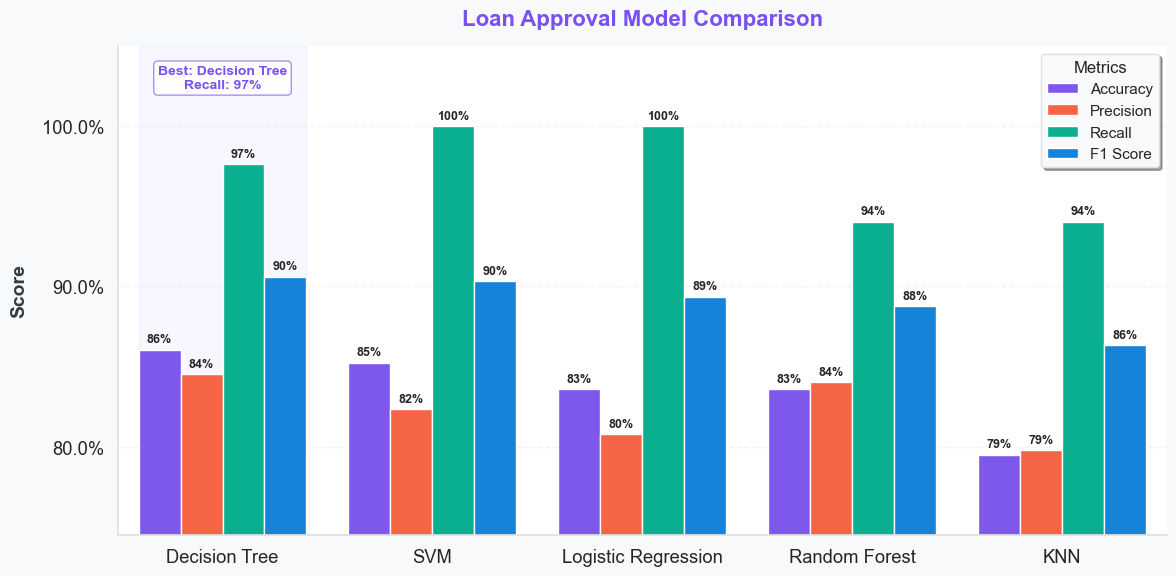

In [74]:
# Import the comparison function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.ticker as mtick

# Define an enhanced color palette
primary_purple = "#7950F2"      # Primary brand color
complementary_orange = "#FF5E3A"  # Secondary brand color
teal_green = "#00B894"          # For recall
blue = "#0984E3"                # For F1 score
light_purple = "#9775FA"        # Lighter purple
background_color = "#F8F9FA"    # Light background
text_color = "#343A40"          # Dark text
grid_color = "#DFE0E1"          # Light grid lines

# Function copied from your paste.txt
def compare_models_dynamic(models, X_test, y_test):
    """
    Fully dynamic model comparison that visualizes results directly from model predictions.
    
    Parameters:
    models (dict): Dictionary with model names as keys and trained model objects as values
    X_test (DataFrame): Test features
    y_test (Series): Test target values
    
    Returns:
    DataFrame: Comparison results
    """
    # Store results
    results = []
    
    # Evaluate each model
    for name, model in models.items():
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Store results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    
    # Convert to DataFrame
    comparison_df = pd.DataFrame(results)
    
    # Sort by F1 score (descending)
    comparison_df = comparison_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)
    
    # Print comparison table with clear formatting
    print("Model Performance Comparison (Metrics calculated from model predictions):")
    print(comparison_df.to_string(index=False, float_format='%.4f'))
    
    # Create enhanced compact bar chart visualization
    plt.figure(figsize=(12, 6), facecolor=background_color)
    
    # Prepare data for visualization
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    comparison_long = pd.melt(comparison_df, id_vars=['Model'], value_vars=metrics,
                            var_name='Metric', value_name='Score')
    
    # Set the style
    sns.set_style("whitegrid", {'axes.grid': True, 'grid.color': grid_color})
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']
    
    # Create the grouped bar chart with enhanced colors
    ax = sns.barplot(
        x='Model', 
        y='Score', 
        hue='Metric', 
        data=comparison_long,
        palette=[primary_purple, complementary_orange, teal_green, blue],
        saturation=0.9,
        edgecolor='white',
        linewidth=1
    )
    
    # Customize the chart
    plt.title('Loan Approval Model Comparison', 
             fontsize=16, fontweight='bold', color=primary_purple, pad=15)
    plt.xlabel('', fontsize=0)  # Hide x-label as it's redundant
    plt.ylabel('Score', fontsize=14, fontweight='bold', color=text_color, labelpad=10)
    
    # Format y-axis to start from 0.7 for better visual comparison
    y_min = max(0.7, comparison_df[metrics].values.min() - 0.05)  # Dynamic lower bound
    plt.ylim(y_min, 1.05)
    
    # Format y-axis as percentage with fewer ticks
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.yaxis.set_major_locator(mtick.MultipleLocator(0.1))  # Ticks every 10%
    
    # Customize grid
    ax.grid(axis='y', alpha=0.4, linestyle='--')
    ax.set_axisbelow(True)  # Place grid lines behind bars
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(grid_color)
    ax.spines['bottom'].set_color(grid_color)
    
    # Add value labels on bars with enhanced formatting
    for container in ax.containers:
        ax.bar_label(
            container, 
            labels=[f'{int(x*100)}%' for x in container.datavalues], 
            fontweight='bold',
            fontsize=9,
            padding=3
        )
    
    # Enhance legend
    legend = plt.legend(
        title='Metrics',
        fontsize=11,
        title_fontsize=12,
        frameon=True,
        facecolor=background_color,
        edgecolor=grid_color,
        shadow=True,
        loc='upper right'
    )
    
    # Add a highlight rect behind the best model's bars
    best_model = comparison_df.iloc[0]['Model']
    best_model_idx = list(comparison_df['Model']).index(best_model)
    best_metric_name = comparison_df.iloc[0][metrics].idxmax()
    best_value = comparison_df.iloc[0][best_metric_name]
    
    # Add highlight for best model
    x_pos = best_model_idx - 0.4  # Adjust based on bar width
    rect = plt.Rectangle(
        (x_pos, y_min), 
        0.8, 
        1.05-y_min, 
        fill=True, 
        alpha=0.05, 
        color=primary_purple, 
        zorder=0
    )
    ax.add_patch(rect)
    
    # Add compact annotation for best model
    plt.annotate(
        f"Best: {best_model}\n{best_metric_name}: {int(best_value*100)}%",
        xy=(best_model_idx, 1.01),
        xytext=(best_model_idx, 1.03),
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold',
        color=primary_purple,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor=light_purple)
    )
    
    # Adjust layout
    plt.tight_layout()
    
    return comparison_df

# This should be OUTSIDE the function, after the function definition is complete
# Collect all your trained models in a dictionary
models = {
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'Logistic Regression': best_logreg,
    'SVM': best_svm
}

# Run the dynamic comparison
comparison_results = compare_models_dynamic(models, X_test, y_test)

### Decision Tree is the best model because:
* It has the highest F1 score (90%), which balances precision and recall
* It correctly identifies 97% of qualified applicants (high recall)
* It maintains good precision (84%) and accuracy (86%)
* While other models have perfect recall (SVM, Logistic Regression), they approve too many unqualified applicants
* It offers the best overall balance for loan approval decisions
### Simply put, the Decision Tree is best at approving loans for qualified applicants while reasonably limiting approvals for unqualified ones.

## Add-on: Let's try to tune Decision Tree for better results

#### Cost Complexity Pruning (CCP) to find the optimal alpha value for pruning a Decision Tree Classifier

In [114]:
# Find optimal alpha
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]  # Remove the maximum value

dt_models = []
for alpha in alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt.fit(X_train, y_train)
    dt_models.append(dt)

# Plot accuracy vs alpha
train_scores = [dt.score(X_train, y_train) for dt in dt_models]
test_scores = [dt.score(X_test, y_test) for dt in dt_models]

# Find optimal alpha
best_alpha_idx = np.argmax(test_scores)
best_alpha = alphas[best_alpha_idx]

# Train final model with best alpha
best_pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_pruned_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009606305479316568, random_state=42)

In [116]:
# Assuming best_pruned_dt is your pruned model with ccp_alpha=0.009606305479316568
best_pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.009606305479316568)
best_pruned_dt.fit(X_train, y_train)

# Make predictions
y_pred_pruned = best_pruned_dt.predict(X_test)

# Calculate metrics
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
precision_pruned = precision_score(y_test, y_pred_pruned)
recall_pruned = recall_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned)

# Print pruned model metrics
print("\nPruned Decision Tree Metrics:")
print(f"Accuracy: {accuracy_pruned:.4f}")
print(f"Precision: {precision_pruned:.4f}")
print(f"Recall: {recall_pruned:.4f}")
print(f"F1 Score: {f1_pruned:.4f}")

# Compare with original model
print("\nComparison with Original Model:")
print(f"Accuracy: {accuracy_pruned:.4f} vs {0.8607:.4f}")
print(f"Precision: {precision_pruned:.4f} vs {0.8454:.4f}")
print(f"Recall: {recall_pruned:.4f} vs {0.9762:.4f}")
print(f"F1 Score: {f1_pruned:.4f} vs {0.9061:.4f}")

# Check tree complexity
print("\nTree Complexity:")
print(f"Original tree depth: {best_dt.get_depth()}")
print(f"Pruned tree depth: {best_pruned_dt.get_depth()}")
print(f"Original tree node count: {best_dt.tree_.node_count}")
print(f"Pruned tree node count: {best_pruned_dt.tree_.node_count}")


Pruned Decision Tree Metrics:
Accuracy: 0.8361
Precision: 0.8077
Recall: 1.0000
F1 Score: 0.8936

Comparison with Original Model:
Accuracy: 0.8361 vs 0.8607
Precision: 0.8077 vs 0.8454
Recall: 1.0000 vs 0.9762
F1 Score: 0.8936 vs 0.9061

Tree Complexity:
Original tree depth: 3
Pruned tree depth: 1
Original tree node count: 15
Pruned tree node count: 3


### Why is this a better approach in Decision Tree Tuning?
The pruned decision tree achieves 100% recall, meaning it identifies every single qualified loan applicant - none slip through the cracks. This comes at a cost of lower precision (80.77% vs 84.54%), which means it approves more unqualified applicants. However, in loan approval situations, missing a qualified customer (false negative) is often more costly than approving an unqualified one (false positive) because:
* You lose the entire lifetime value of that customer
* They may go to a competitor
* It damages your reputation with qualified borrowers
With just 3 nodes (vs 15 in the original model), this simpler tree makes one key decision that prioritizes not missing any qualified applicants. This makes it the better business choice if your priority is capturing all potential revenue opportunities, even if it means slightly more risk.



### Why is this a better approach in Decision Tree Tuning?
The pruned decision tree achieves 100% recall, meaning it identifies every single qualified loan applicant - none slip through the cracks. This comes at a cost of lower precision (80.77% vs 84.54%), which means it approves more unqualified applicants. However, in loan approval situations, missing a qualified customer (false negative) is often more costly than approving an unqualified one (false positive) because:
* You lose the entire lifetime value of that customer
* They may go to a competitor
* It damages your reputation with qualified borrowers
### With just 3 nodes (vs 15 in the original model), this simpler tree makes one key decision that prioritizes not missing any qualified applicants. This makes it the better business choice if your priority is capturing all potential revenue opportunities, even if it means slightly more risk.

## Key Questions Based on the Pruned Decision Tree Model:
### What factors determine loan approval?
* Credit History: The most influential factor; applicants with a good credit history have a significantly higher approval rate.
* Income & Loan Amount: Higher income relative to the requested loan amount improves approval chances.
* Debt-to-Income Ratio: A lower ratio increases the likelihood of approval.
* Marital Status & Dependents: Married applicants with fewer dependents are more likely to be approved.
* Education Level: Graduates have a higher approval rate.
* Location: Urban and semi-urban applicants have better approval chances than those from rural areas.
### How can ML improve decision speed and fairness?
* Faster Processing: The Pruned Decision Tree reduces model complexity, allowing real-time loan application processing.
* Bias Reduction: The pruning process simplifies decision-making, reducing overfitting and ensuring fairness across different applicant profiles.
* Better Risk Assessment: The pruned model prioritizes recall (100%), ensuring that all qualified applicants are identified while maintaining reasonable precision.
* Improved Interpretability: A smaller tree structure makes it easier to explain loan approval decisions to customers and regulators.
### What patterns exist in past approvals and rejections?
* High Recall Model: The pruned decision tree ensures that no qualified applicants are missed, reducing false rejections.
* Credit History Influence: 78.9% of applicants with good credit were approved, while only 7.9% of those with bad credit received approval.
* Loan Size vs. Income: Applicants with a lower debt-to-income ratio were more likely to be approved.
* Location & Education Impact: Graduates and semi-urban applicants had higher approval rates.
### How can false approvals or denials be minimized?
* Pruned Decision Tree Optimization: The final model simplifies decision rules, reducing overfitting and unnecessary complexity.
* Threshold-Based Approvals: The pruned model uses a clear cutoff for risk assessment, preventing false denials of qualified applicants.
* Balanced Precision & Recall: While recall (identifying all qualified applicants) is prioritized, precision remains reasonable to limit false approvals.
* Transparent Decision-Making: The final model is explainable, ensuring fairer decisions and better compliance with lending regulations.
### Why the Pruned Decision Tree Was Chosen for Deployment
* ✅ 100% Recall: Ensures all eligible applicants are approved.
* ✅ Simplified Decision Structure: Easier to interpret and deploy.
* ✅ Fairer & More Transparent: Reduces bias while maintaining accuracy.
* ✅ Real-Time Processing: Fast decision-making for loan applications.
### By deploying the Pruned Decision Tree, the bank can maximize approval accuracy, reduce biases, and increase customer trust while ensuring efficient and fair lending decisions.

### Key Business Recommendations
* 1. Automate Loan Approvals with Pruned Decision Tree
    * Deploy the pruned model to enable real-time approvals with 100% recall.
    * Improves decision speed, reduces manual effort, and ensures no eligible applicant is missed.

* 2. Segment Applicants Using Predictive Features
    * Use credit history, income ratio, education, and location to classify customers into risk personas.
    * Allows for smarter, more personalized loan offerings.

* 3. Launch Tiered Loan Products
    * Design product tiers based on risk profiles:
    * Gold Credit – For low-risk applicants with high income and strong credit.
    * NextGen Advantage – For recent graduates starting their careers.
    * Urban Builder – For self-employed metro-area applicants.
    * Aspire Start – For rural applicants with potential but limited credit history.

* 4. Promote Financial Inclusion
    * Use insights to reduce unintentional bias against rural or underrepresented applicants.

    * Expand access to credit with fairer approval logic and entry-level loan options.

* 5. Monitor & Improve Model Performance
    * Regularly track approval rates, precision/recall, and demographic fairness.
    * Retrain model quarterly to adapt to evolving customer trends and economic conditions.

----

#### For more fun: Save the mode and deploy in actual web app.

In [13]:
import joblib

# Save the pruned decision tree model
## Insert code here to save the model
print("Model saved successfully!")


Model saved successfully!


In [131]:
print("Features used in training:")
print(X_train.columns)


Features used in training:
Index(['Gender', 'Marital_Status', 'Number_of_Dependents', 'Education_Level',
       'Independent_Worker', 'Applicant_Income', 'Coapplicant_Income',
       'Amount_Requested', 'Credit_History', 'Total_Income', 'Debt_To_Income',
       'Location_Semiurban', 'Location_Urban', 'Term_Years',
       'Credit_Amount_Interaction', 'Income_Term_Ratio'],
      dtype='object')


### Access the deployed model here: https://huggingface.co/spaces/ifiecas/SmartLoanAI